# **WINE CLASSIFICATION USING NEURAL NETWORK**







# **Import libraries**

In [ ]:
# Installation
!pip3 install ann_visualizer
!pip install graphviz

# Data Preparation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model Development
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

# Model Visualisation
from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
import graphviz

# Model Tuning
from keras.optimizers import Adam, RMSprop, SGD

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,roc_curve, auc

from matplotlib import pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Data Preparation**


> Load the given dataset of chemical information about wine. Merge the two datasets and prepare the data for modeling. Split the dataset into training, validation and testing sets for model evaluation.



In [ ]:
# Load the dataset
white_wine_data=pd.read_csv("/content/winequality-white.csv",delimiter=";")
red_wine_data=pd.read_csv("/content/winequality-red.csv",delimiter=";")

# **White Wine**

In [ ]:
# Info of data
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
# Check for null values
print("\033[1mNumber of null values in each columns: \033[0m")
white_wine_data.isnull().sum()

Number of null values in each columns: 


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in white wine dataset

In [ ]:
# Extract attributes information
col_list=white_wine_data.columns.values.tolist()

for col_name in col_list:
  print (white_wine_data.groupby(col_name).size())
  print ("\n")

fixed acidity
3.8     1
3.9     1
4.2     2
4.4     3
4.5     1
       ..
10.2    1
10.3    2
10.7    2
11.8    1
14.2    1
Length: 68, dtype: int64


volatile acidity
0.080    4
0.085    1
0.090    1
0.100    6
0.105    6
        ..
0.910    1
0.930    1
0.965    1
1.005    1
1.100    1
Length: 125, dtype: int64


citric acid
0.00    19
0.01     7
0.02     6
0.03     2
0.04    12
        ..
0.91     2
0.99     1
1.00     5
1.23     1
1.66     1
Length: 87, dtype: int64


residual sugar
0.60      2
0.70      7
0.80     25
0.90     39
0.95      4
         ..
22.60     1
23.50     1
26.05     2
31.60     2
65.80     1
Length: 310, dtype: int64


chlorides
0.009    1
0.012    1
0.013    1
0.014    4
0.015    4
        ..
0.255    1
0.271    1
0.290    1
0.301    1
0.346    1
Length: 160, dtype: int64


free sulfur dioxide
2.0       1
3.0      10
4.0      11
5.0      25
6.0      32
         ..
128.0     1
131.0     1
138.5     1
146.5     1
289.0     1
Length: 132, dtype: int64


total sul

In [ ]:
# Remove duplicated data 
print ("Before remove duplicated data: ",white_wine_data.shape)
print ("Number of duplicated rows: ",white_wine_data.duplicated().sum())
white_wine_data=white_wine_data.drop_duplicates()
print ("After remove duplicated data: ",white_wine_data.shape)

Before remove duplicated data:  (4898, 12)
Number of duplicated rows:  937
After remove duplicated data:  (3961, 12)


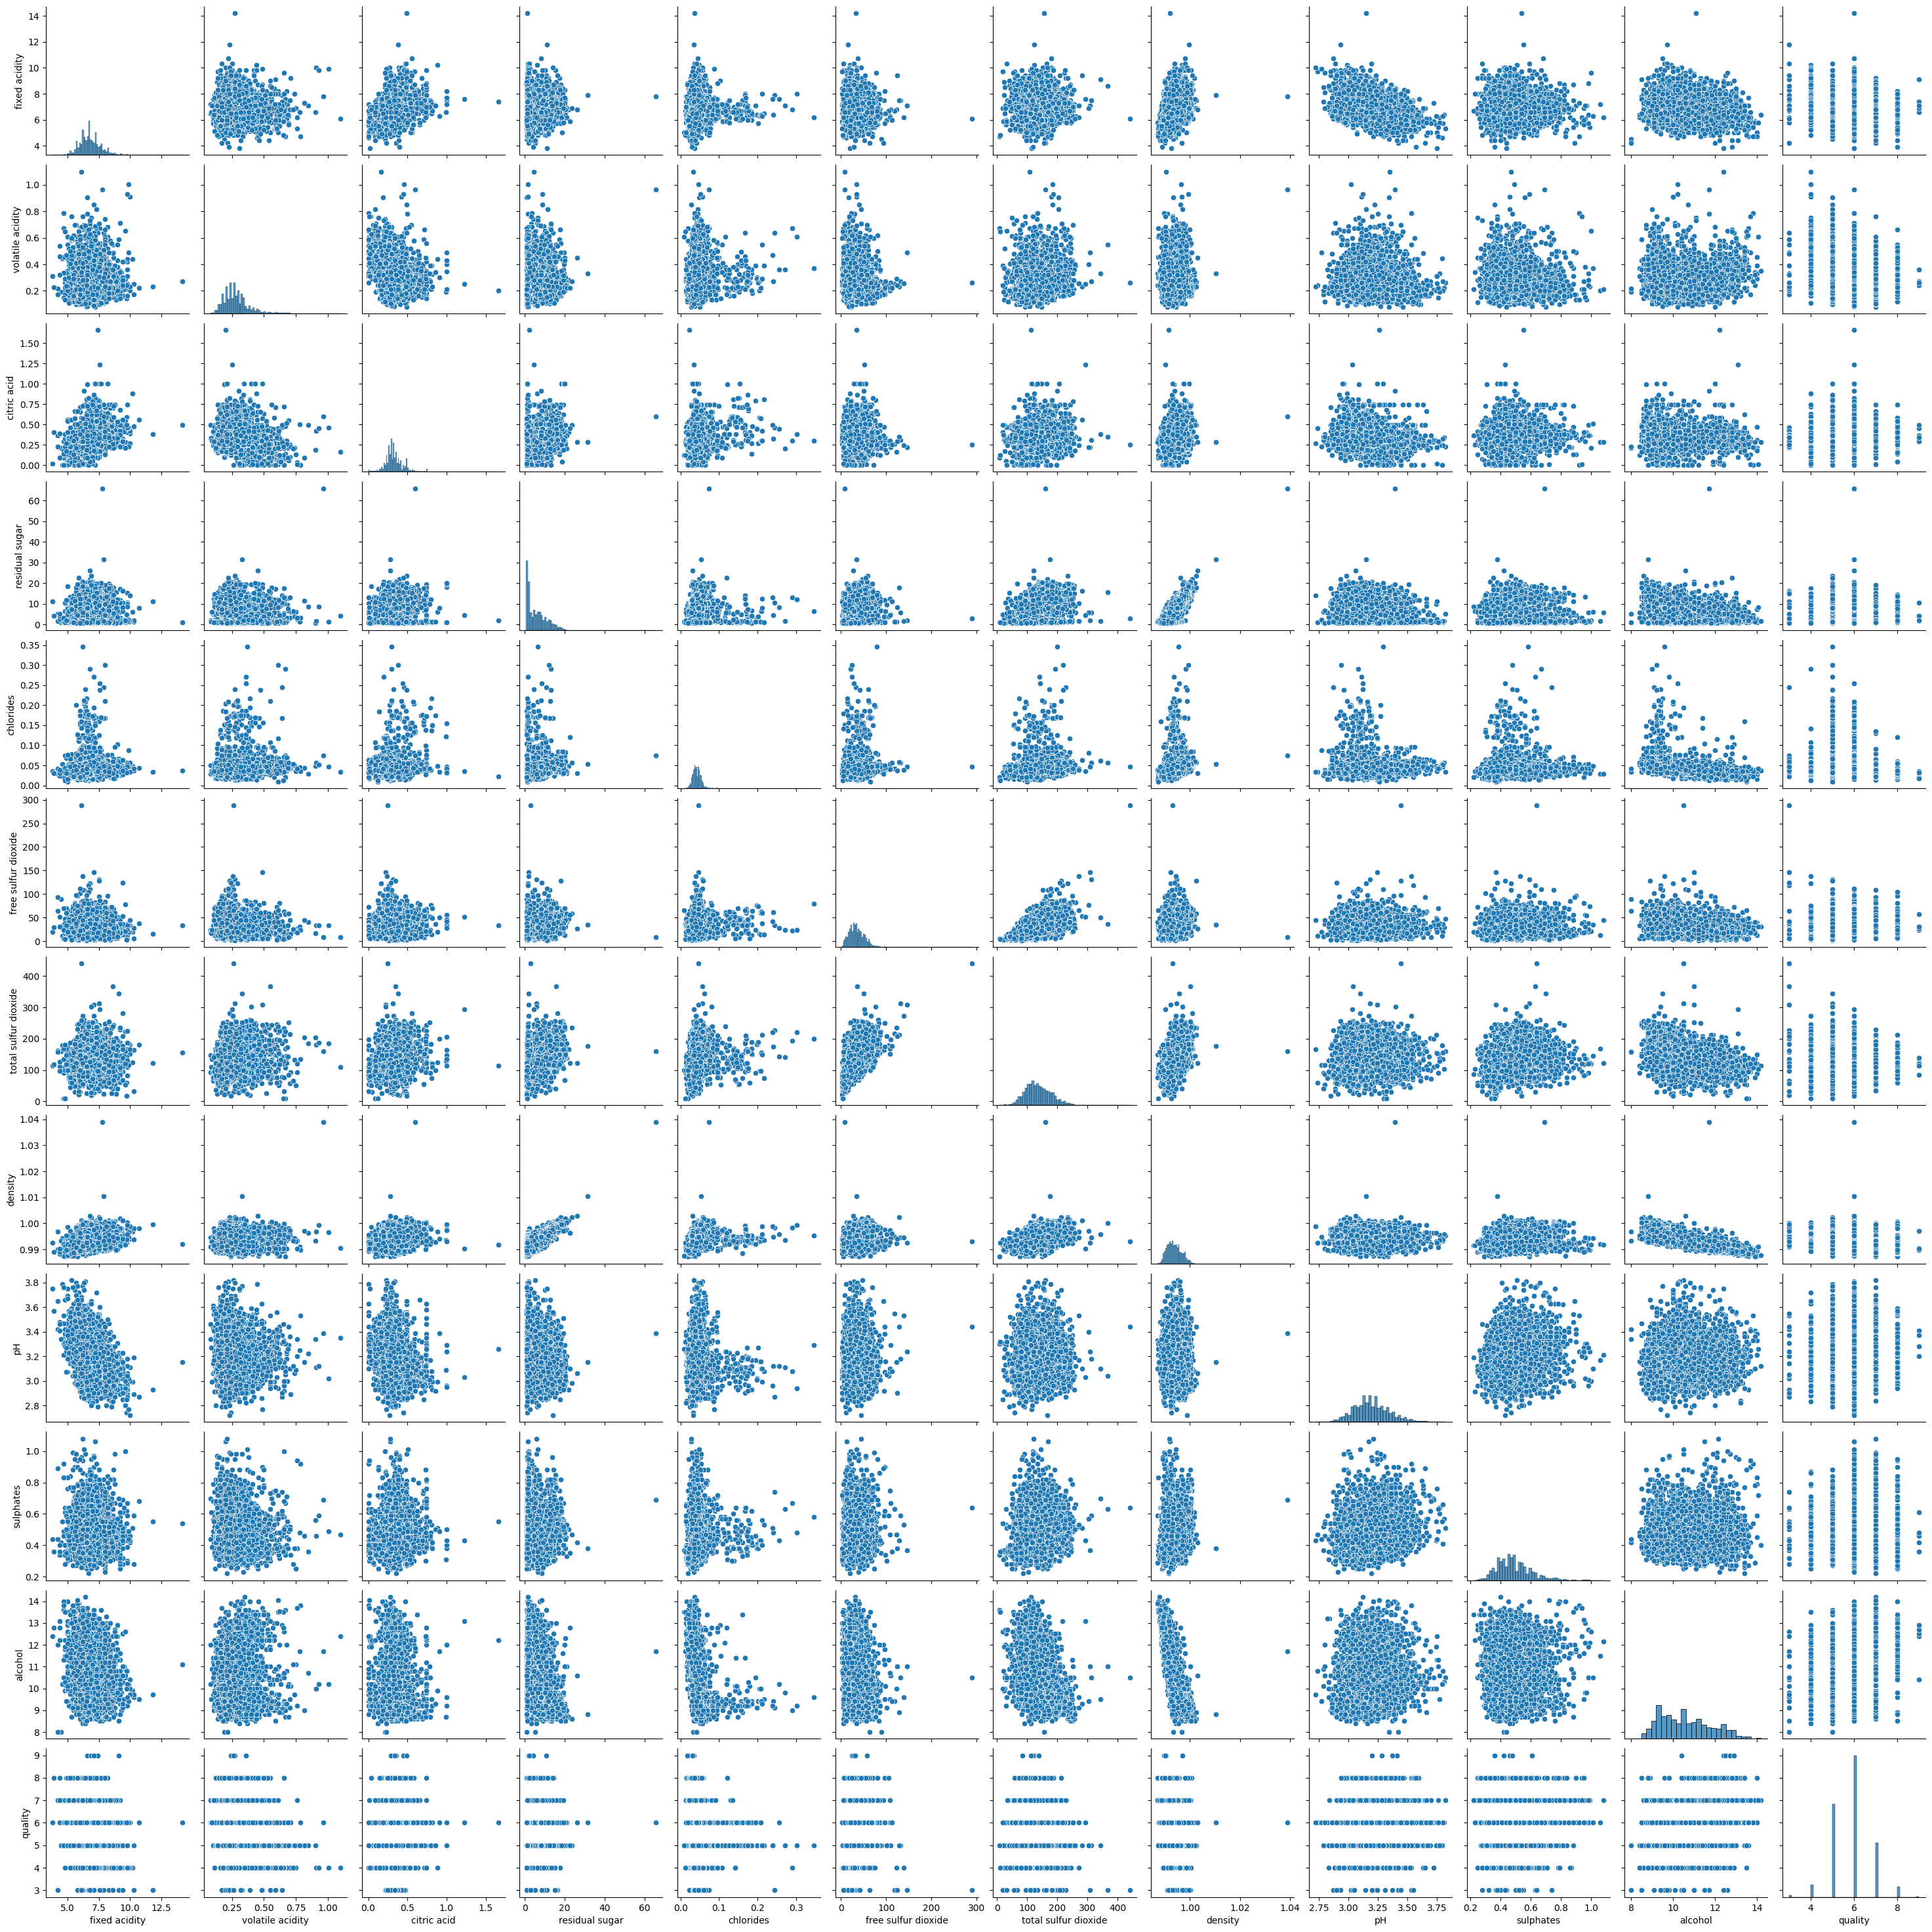

In [ ]:
# Visualize the numerical variables 
sns.pairplot(white_wine_data)
plt.show()

In [ ]:
# Outlier analysis for white wine
q1, q3 = np.percentile(white_wine_data, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Create conditions to isolate the outliers
outliers = white_wine_data[(white_wine_data < lower_bound) | (white_wine_data > upper_bound)]
print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
6               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
4893            NaN               NaN          NaN             NaN        NaN   
4894            NaN               NaN          NaN             NaN        NaN   
4895            NaN               NaN          NaN             NaN        NaN   
4896            NaN               NaN          NaN             NaN        NaN   
4897            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

From the above result, we know that "free sulfur dioxide" and "total sulfur dioxide" have outliers.

In [ ]:
# Copy the datset so old dataset no change
whiteWineWithoutOutlier=white_wine_data.copy()

# IQR
# Calculate the upper and lower limits
Q1 = whiteWineWithoutOutlier['free sulfur dioxide'].quantile(0.25)
Q3 = whiteWineWithoutOutlier['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(whiteWineWithoutOutlier['free sulfur dioxide']>=upper)[0]
lower_array = np.where(whiteWineWithoutOutlier['free sulfur dioxide']<=lower)[0]
 
# Removing the outliers
whiteWineWithoutOutlier.drop(index=whiteWineWithoutOutlier.index[upper_array], inplace=True)
whiteWineWithoutOutlier.drop(index=whiteWineWithoutOutlier.index[lower_array], inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", whiteWineWithoutOutlier.shape)

New Shape:  (3913, 12)


In [ ]:
# Remove for total sulfur dioxide and free sulfur dioxide
whiteWineWithoutOutlier2=whiteWineWithoutOutlier.copy()

# Calculate the upper and lower limits
Q1 = whiteWineWithoutOutlier2['total sulfur dioxide'].quantile(0.25)
Q3 = whiteWineWithoutOutlier2['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(whiteWineWithoutOutlier2['total sulfur dioxide']>=upper)[0]
lower_array = np.where(whiteWineWithoutOutlier2['total sulfur dioxide']<=lower)[0]
 
# Removing the outliers
whiteWineWithoutOutlier2 = whiteWineWithoutOutlier2.drop(index=whiteWineWithoutOutlier2.index[upper_array][np.isin(upper_array,whiteWineWithoutOutlier2.index)])
whiteWineWithoutOutlier2 = whiteWineWithoutOutlier2.drop(index=whiteWineWithoutOutlier2.index[lower_array][np.isin(lower_array, whiteWineWithoutOutlier2.index)])

# Print the new shape of the DataFrame
print("New Shape: ", whiteWineWithoutOutlier2.shape)

New Shape:  (3903, 12)


In [ ]:
# Remove for total sulfur dioxide
whiteWineWithoutOutlier3=white_wine_data.copy()

# Calculate the upper and lower limits
Q1 = whiteWineWithoutOutlier3['total sulfur dioxide'].quantile(0.25)
Q3 = whiteWineWithoutOutlier3['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(whiteWineWithoutOutlier3['total sulfur dioxide']>=upper)[0]
lower_array = np.where(whiteWineWithoutOutlier3['total sulfur dioxide']<=lower)[0]
 
# Removing the outliers
whiteWineWithoutOutlier3 = whiteWineWithoutOutlier3.drop(index=whiteWineWithoutOutlier3.index[upper_array][np.isin(upper_array,whiteWineWithoutOutlier3.index)])
whiteWineWithoutOutlier3= whiteWineWithoutOutlier3.drop(index=whiteWineWithoutOutlier3.index[lower_array][np.isin(lower_array, whiteWineWithoutOutlier3.index)])

# Print the new shape of the DataFrame
print("New Shape: ", whiteWineWithoutOutlier3.shape)

New Shape:  (3950, 12)


In [ ]:
# Check skewness for each column 
numeric_cols=white_wine_data.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
  skewness=white_wine_data[col].skew()
  print("Skewness of {}: {}".format(col,skewness))

Skewness of fixed acidity: 0.6961002189465597
Skewness of volatile acidity: 1.6410809789536034
Skewness of citric acid: 1.3106010172583804
Skewness of residual sugar: 1.333639018039196
Skewness of chlorides: 4.9690763179339195
Skewness of free sulfur dioxide: 1.5666802198269172
Skewness of total sulfur dioxide: 0.4567996770589028
Skewness of density: 1.273317860741664
Skewness of pH: 0.45545683102180484
Skewness of sulphates: 0.937853335745201
Skewness of alcohol: 0.4506965980443857
Skewness of quality: 0.11200403450750412


# **Red Wine**

In [ ]:
# Info of dataset
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Check for null values
print("\033[1mNumber of null values in each columns: \033[0m")
red_wine_data.isnull().sum()

Number of null values in each columns: 


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in red wine dataset

In [ ]:
# Extract attributes information
col_list=red_wine_data.columns.values.tolist()

for col_name in col_list:
  print (red_wine_data.groupby(col_name).size())
  print ("\n")

fixed acidity
4.6     1
4.7     1
4.9     1
5.0     6
5.1     4
       ..
14.3    1
15.0    2
15.5    2
15.6    2
15.9    1
Length: 96, dtype: int64


volatile acidity
0.120     3
0.160     2
0.180    10
0.190     2
0.200     3
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Length: 143, dtype: int64


citric acid
0.00    132
0.01     33
0.02     50
0.03     30
0.04     29
       ... 
0.75      1
0.76      3
0.78      1
0.79      1
1.00      1
Length: 80, dtype: int64


residual sugar
0.9      2
1.2      8
1.3      5
1.4     35
1.5     30
        ..
13.4     1
13.8     2
13.9     1
15.4     2
15.5     1
Length: 91, dtype: int64


chlorides
0.012    2
0.034    1
0.038    2
0.039    4
0.041    4
        ..
0.422    1
0.464    1
0.467    1
0.610    1
0.611    1
Length: 153, dtype: int64


free sulfur dioxide
1.0       3
2.0       1
3.0      49
4.0      41
5.0     104
5.5       1
6.0     138
7.0      71
8.0      56
9.0      62
10.0     79
11.0     59
12.0     75
13.

In [ ]:
# Remove duplicated data 
print ("Before remove duplicated data: ",red_wine_data.shape)
print ("Number of duplicated rows: ",red_wine_data.duplicated().sum())
red_wine_data=red_wine_data.drop_duplicates()
print ("After remove duplicated data: ",red_wine_data.shape)

Before remove duplicated data:  (1599, 12)
Number of duplicated rows:  240
After remove duplicated data:  (1359, 12)


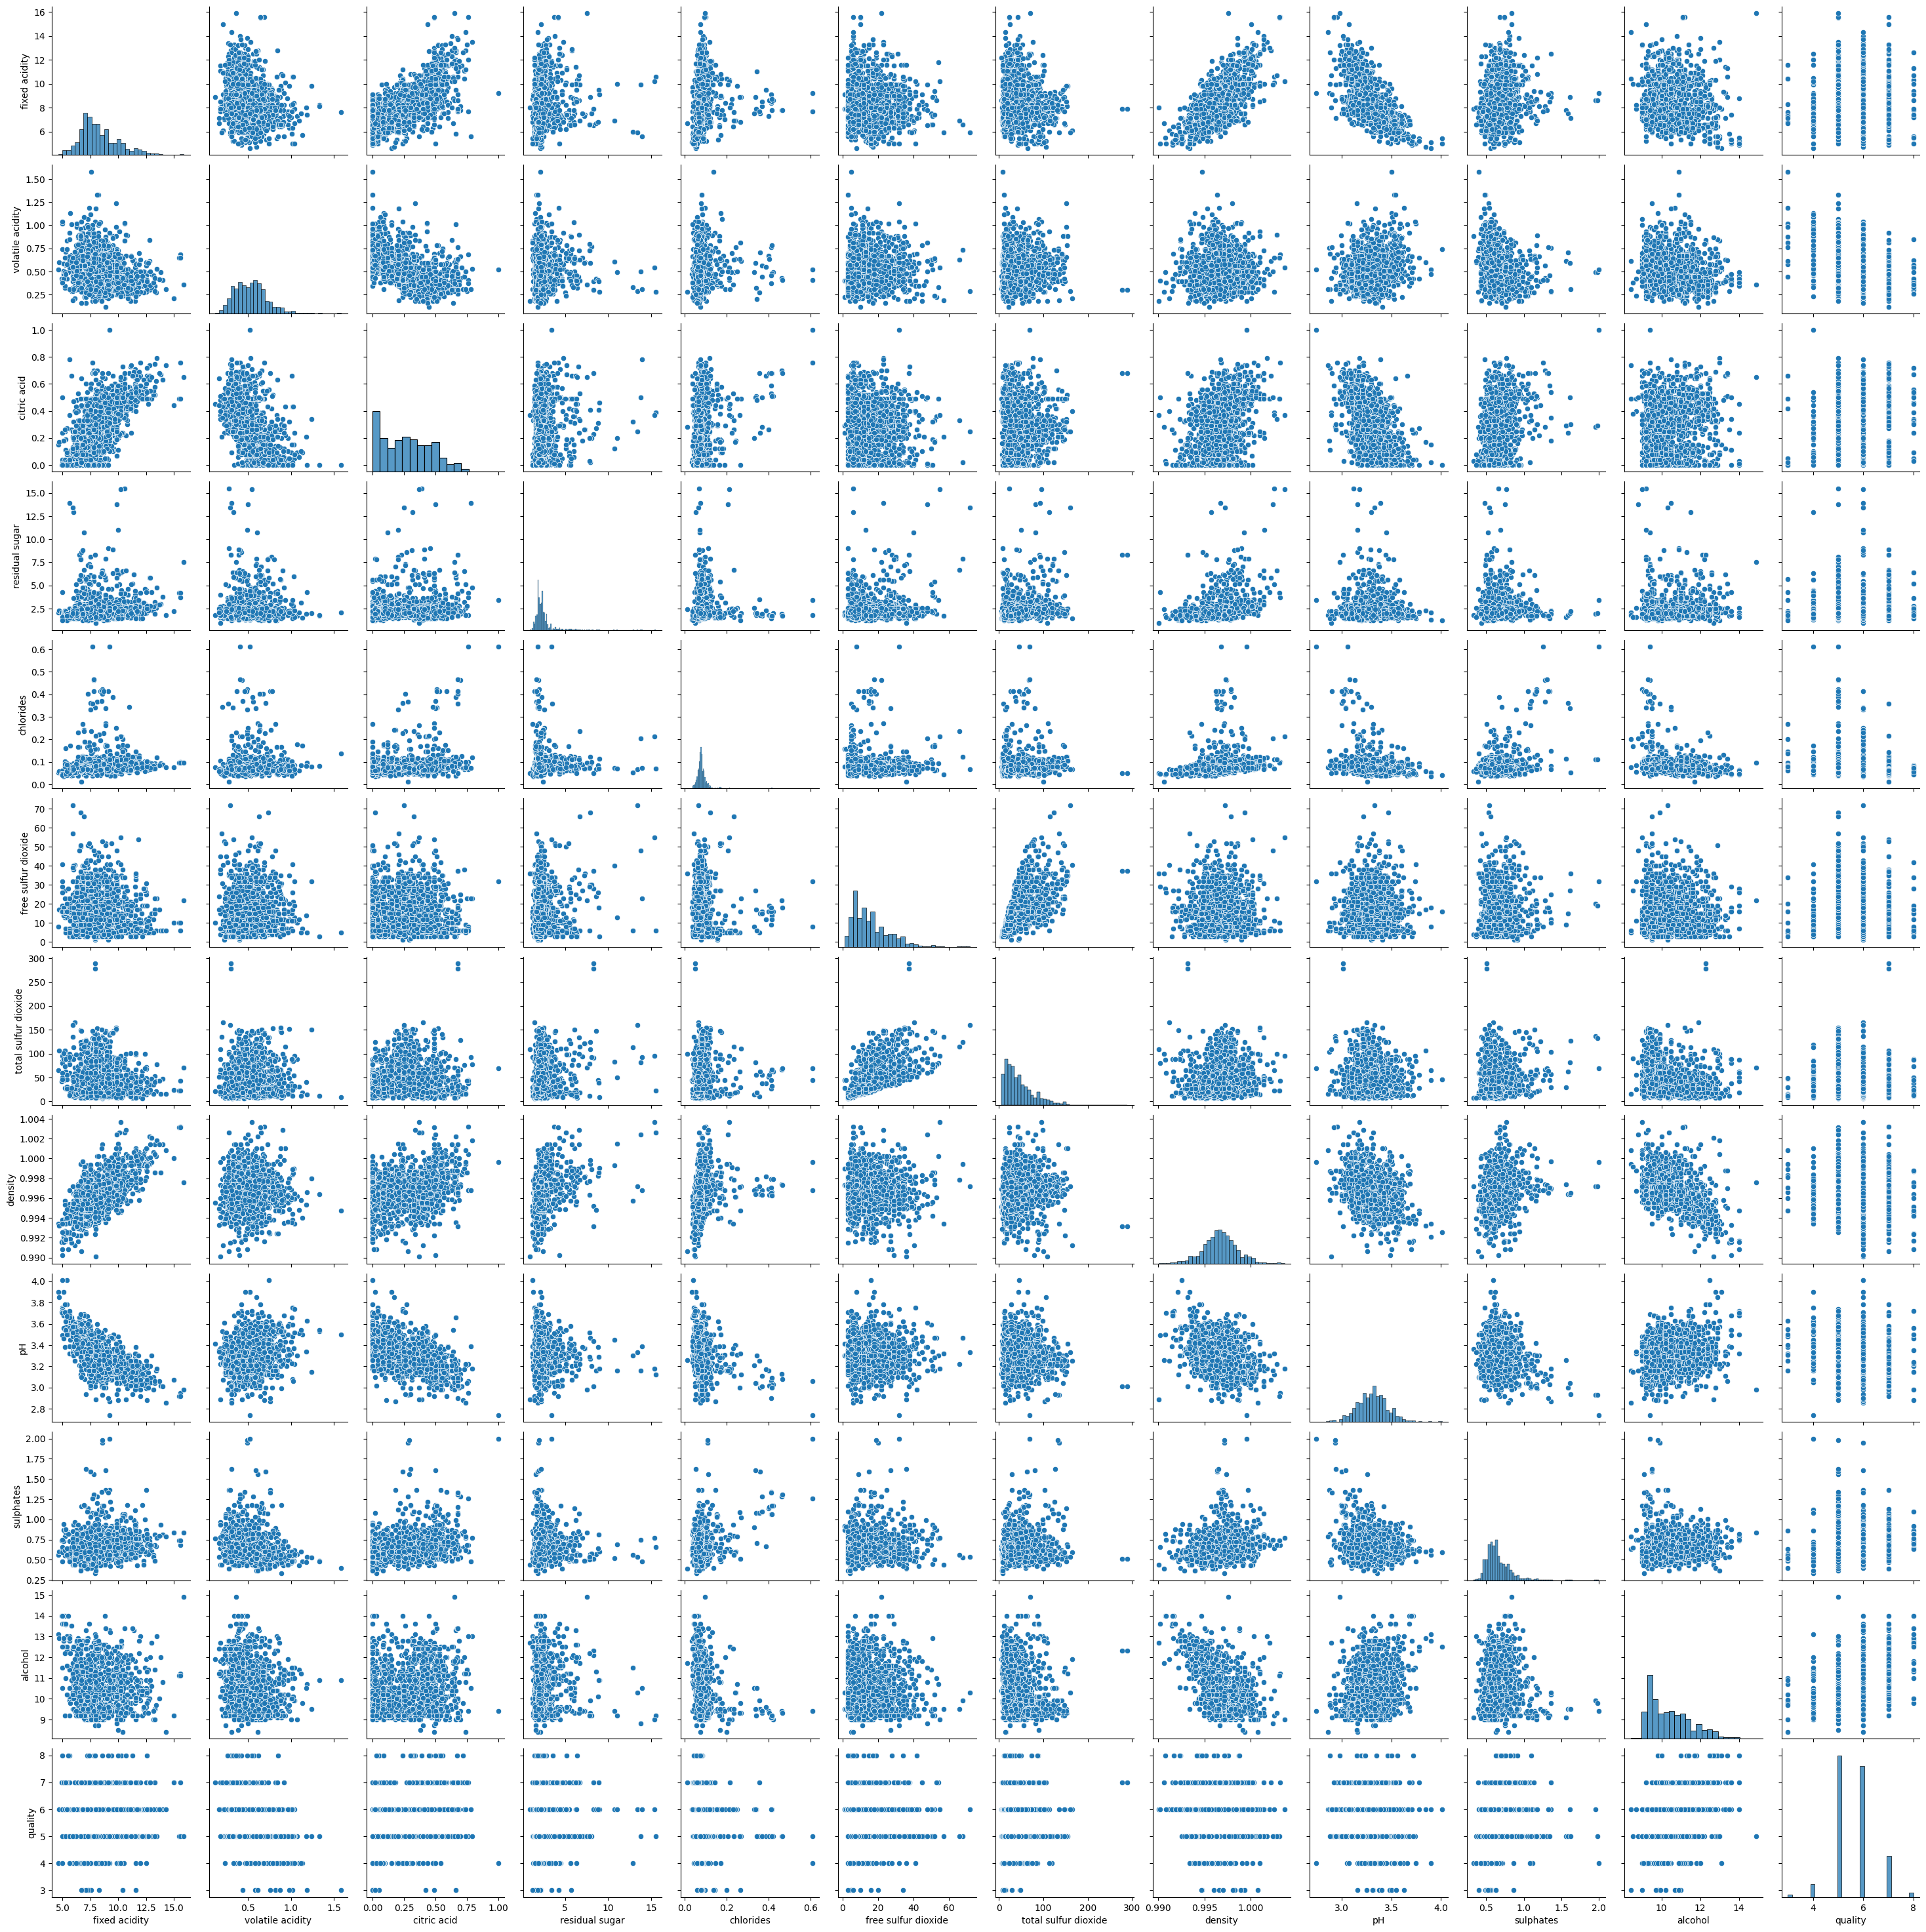

In [ ]:
# Visualize the numerical variables 
sns.pairplot(red_wine_data)
plt.show()

In [ ]:
# Outlier analysis for red wine
q1, q3 = np.percentile(red_wine_data, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Create conditions to isolate the outliers
outliers = red_wine_data[(red_wine_data < lower_bound) | (red_wine_data > upper_bound)]
print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
5               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
1593            NaN               NaN          NaN             NaN        NaN   
1594            NaN               NaN          NaN             NaN        NaN   
1595            NaN               NaN          NaN             NaN        NaN   
1597            NaN               NaN          NaN             NaN        NaN   
1598            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

From the above result, we know that "free sulfur dioxide" and "total sulfur dioxide" have outliers.

In [ ]:
# Copy the datset so old dataset no change
redWineWithoutOutlier=red_wine_data.copy()

# IQR
# Calculate the upper and lower limits
Q1 = redWineWithoutOutlier['free sulfur dioxide'].quantile(0.25)
Q3 = redWineWithoutOutlier['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(redWineWithoutOutlier['free sulfur dioxide']>=upper)[0]
lower_array = np.where(redWineWithoutOutlier['free sulfur dioxide']<=lower)[0]
 
# Removing the outliers
redWineWithoutOutlier.drop(index=redWineWithoutOutlier.index[upper_array], inplace=True)
redWineWithoutOutlier.drop(index=redWineWithoutOutlier.index[lower_array], inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", redWineWithoutOutlier.shape)

New Shape:  (1330, 12)


In [ ]:
# Remove for total sulfur dioxide and free sulfur dioxide
redWineWithoutOutlier2=redWineWithoutOutlier.copy()

# Calculate the upper and lower limits
Q1 = redWineWithoutOutlier2['total sulfur dioxide'].quantile(0.25)
Q3 = redWineWithoutOutlier2['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(redWineWithoutOutlier2['total sulfur dioxide']>=upper)[0]
lower_array = np.where(redWineWithoutOutlier2['total sulfur dioxide']<=lower)[0]
 
# Removing the outliers
redWineWithoutOutlier2 = redWineWithoutOutlier2.drop(index=redWineWithoutOutlier2.index[upper_array][np.isin(upper_array,redWineWithoutOutlier2.index)])
redWineWithoutOutlier2 = redWineWithoutOutlier2.drop(index=redWineWithoutOutlier2.index[lower_array][np.isin(lower_array, redWineWithoutOutlier2.index)])

# Print the new shape of the DataFrame
print("New Shape: ", redWineWithoutOutlier2.shape)

New Shape:  (1291, 12)


In [ ]:
# Remove for total sulfur dioxide
redWineWithoutOutlier3=red_wine_data.copy()

# Calculate the upper and lower limits
Q1 = redWineWithoutOutlier3['total sulfur dioxide'].quantile(0.25)
Q3 = redWineWithoutOutlier3['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(redWineWithoutOutlier3['total sulfur dioxide']>=upper)[0]
lower_array = np.where(redWineWithoutOutlier3['total sulfur dioxide']<=lower)[0]
 
# Removing the outliers
redWineWithoutOutlier3 = redWineWithoutOutlier3.drop(index=redWineWithoutOutlier3.index[upper_array][np.isin(upper_array,redWineWithoutOutlier3.index)])
redWineWithoutOutlier3= redWineWithoutOutlier3.drop(index=redWineWithoutOutlier3.index[lower_array][np.isin(lower_array, redWineWithoutOutlier3.index)])

# Print the new shape of the DataFrame
print("New Shape: ", redWineWithoutOutlier3.shape)



New Shape:  (1320, 12)


In [ ]:
# Check skewness for each column 
numeric_cols=red_wine_data.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
  skewness=red_wine_data[col].skew()
  print("Skewness of {}: {}".format(col,skewness))

Skewness of fixed acidity: 0.9410413664561449
Skewness of volatile acidity: 0.7292789463991854
Skewness of citric acid: 0.31272554238899036
Skewness of residual sugar: 4.548153403940447
Skewness of chlorides: 5.502487294623722
Skewness of free sulfur dioxide: 1.2265794991760643
Skewness of total sulfur dioxide: 1.5403680777213933
Skewness of density: 0.04477785573116107
Skewness of pH: 0.2320322752014824
Skewness of sulphates: 2.4065046145674196
Skewness of alcohol: 0.8598411692032926
Skewness of quality: 0.19240658731658308


# **EDA**

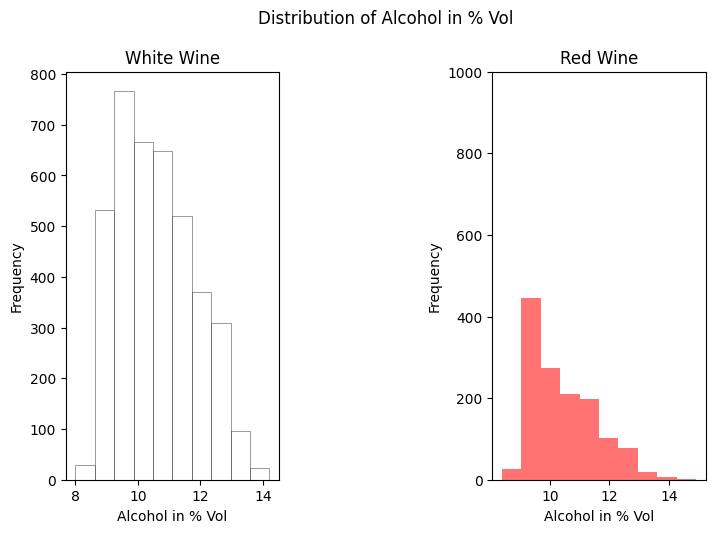

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[1].hist(red_wine_data.alcohol, 10, facecolor='red', alpha=0.55, label="Red wine")
ax[0].hist(white_wine_data.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.55, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.85, hspace=0.05, wspace=1)
#graph for frequency vs alcohon(red wine)
ax[0].set_title("White Wine")
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")

#graph for frequency vs alcohon(white wine)
ax[1].set_title("Red Wine")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

# **Merge white wine and red wine datasets**

In [ ]:
# Create a new DataFrame for red wines to avoid SettingWithCopyWarning
red_wines = red_wine_data.copy()
red_wines.loc[:, 'type'] = 0

# Create a new DataFrame for white wines to avoid SettingWithCopyWarning
white_wines = white_wine_data.copy()
white_wines.loc[:, 'type'] = 1

# Concatenate red and white wines
wines = pd.concat([white_wines, red_wines], ignore_index=True)
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               6.2             0.320         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.8             0.620         0.08             1.9      0.068   
5316            6.2             0.600         0.08             2.0      0.090   
5317            5.9             0.550         0.10             2.2      0.062   
5318            5.9             0.645         0.12             2.0      0.075   
5319            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
5315                 28.0                  38.0  0.99651  3.42       0.82   
5316                 32.0                  44.0  0.99490  3.45       0.58   
5317                 39.0                  51.0  0.99512  3.52       0.76   
5318                 32.0                  44.0  0.99547  3.57       0.71   
5319                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  type  
0         8.8        6     1  
1         9.5        6     1  
2        10.1        6     1  
3         9.9        6     1  
4         9.6        6     1  
...       ...      ...   ...  
5315      9.5        6     0  
5316     10.5        5     0  
5317     11.2        6     0  
5318     10.2        5     0  
5319     11.0        6     0  

[5320 rows x 13 columns]

In [ ]:
wines.shape

(5320, 13)

In [ ]:
wines.nunique().sort_values()

type                      2
quality                   7
citric acid              89
fixed acidity           106
pH                      108
sulphates               111
alcohol                 111
free sulfur dioxide     135
volatile acidity        187
chlorides               214
total sulfur dioxide    276
residual sugar          316
density                 998
dtype: int64

In [ ]:
wines.to_csv('cleaned_wines.csv', index=False)

# **Remove Outliers**

In [ ]:
#Identify the skewness and outliers
skewness = wines.skew()
Q1 = wines.quantile(0.25)
Q3 = wines.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wines < (Q1 - 1.5 * IQR)) | (wines > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
wines = wines[~outliers]

# **Correlation heatmap between features and target variables**

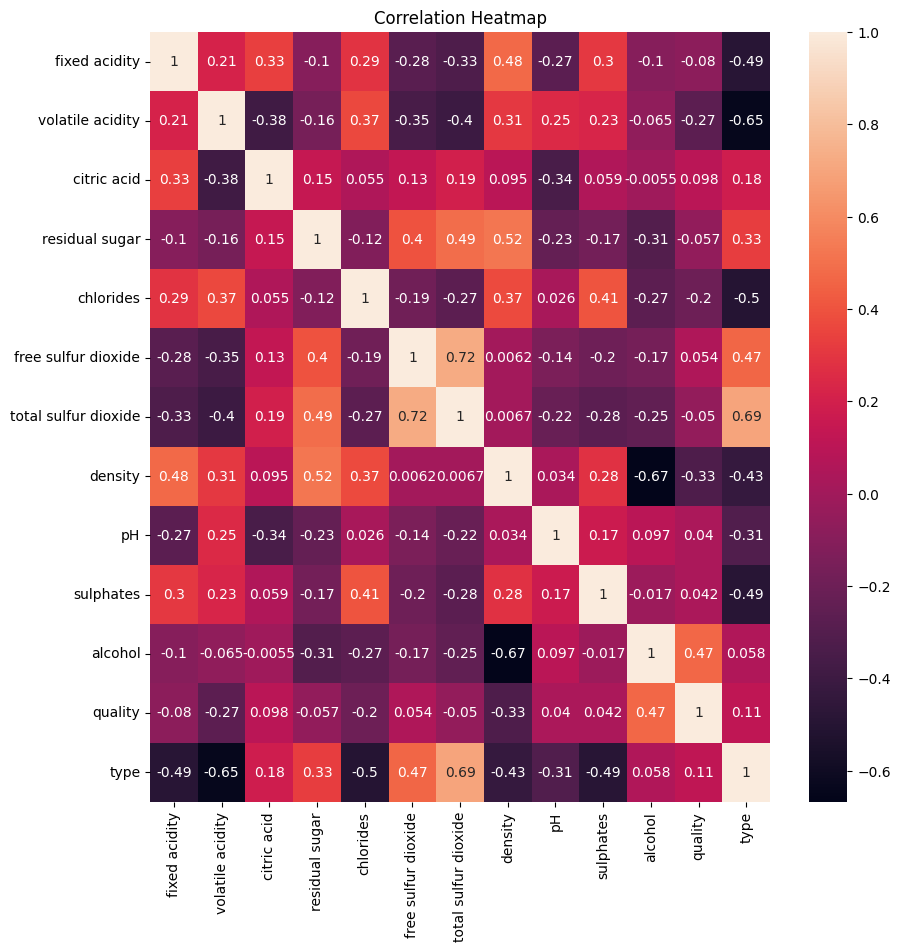

In [ ]:
# Find correlation between the features and the target variables
plt.figure(figsize=(10,10))
sns.heatmap(wines.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

# **Standardization**

In [ ]:
# Show list of columns name of dataset
print('\033[1mList of columns name: \033[0m{}'.format(wines.columns))

List of columns name: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


In [ ]:
wines.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               6.2             0.320         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.8             0.620         0.08             1.9      0.068   
5316            6.2             0.600         0.08             2.0      0.090   
5317            5.9             0.550         0.10             2.2      0.062   
5318            5.9             0.645         0.12             2.0      0.075   
5319            6.0             0.310         0.47             3.6      0.067

In [ ]:
# Only standardize non-category feature
num_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [ ]:
# Define the scaler
scaler = StandardScaler().fit(wines[num_vars])

# Scale the non-categorical feature
wines[num_vars]= scaler.transform(wines[num_vars])

In [ ]:
wines.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   5.320000e+03      5.320000e+03  5.320000e+03     5320.000000   
mean    3.419153e-16     -4.273941e-17  4.273941e-17        0.000000   
std     1.000094e+00      1.000094e+00  1.000094e+00        1.000094   
min    -2.588145e+00     -1.570028e+00 -2.164515e+00       -0.988604   
25%    -6.177717e-01     -6.784048e-01 -5.334545e-01       -0.721923   
50%    -1.630701e-01     -2.623138e-01 -5.772841e-02       -0.521912   
75%     3.674151e-01      3.915434e-01  5.539194e-01        0.544812   
max     6.581671e+00      7.346207e+00  9.116989e+00       13.501067   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.320000e+03         5.320000e+03          5.320000e+03  5.320000e+03   
mean   1.282182e-16         4.273941e-17         -8.547883e-17  1.853822e-14   
std    1.000094e+00         1.000094e+00          1.000094e+00  1.000094e+00   
min   -1.293816e+00        -1.630964e+00         -1.904371e+00 -2.504125e+00   
25%   -5.070517e-01        -7.884267e-01         -7.065318e-01 -7.875618e-01   
50%   -2.628836e-01        -1.143971e-01          3.331010e-02  3.868208e-02   
75%    2.525824e-01         6.158017e-01          6.894794e-01  7.536359e-01   
max    1.503832e+01         1.454575e+01          5.740662e+00  1.498864e+01   

                 pH     sulphates       alcohol      quality         type  
count  5.320000e+03  5.320000e+03  5.320000e+03  5320.000000  5320.000000  
mean   6.197215e-16 -2.136971e-17  6.838306e-16     5.795677     0.744549  
std    1.000094e+00  1.000094e+00  1.000094e+00     0.879772     0.436155  
min   -3.146985e+00 -2.092831e+00 -2.149768e+00     3.000000     0.000000  
25%   -7.150198e-01 -6.902954e-01 -8.848223e-01     5.000000     0.000000  
50%   -9.143899e-02 -1.559963e-01 -1.258547e-01     6.000000     1.000000  
75%    6.568580e-01  4.450903e-01  7.174425e-01     6.000000     1.000000  
max    4.897208e+00  9.795325e+00  3.668983e+00     9.000000     1.000000

In [ ]:
wines

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.163070         -0.440639     0.282076        3.478304  -0.317143   
1         -0.693555         -0.262314     0.146154       -0.766370  -0.208624   
2          0.670550         -0.381197     0.553919        0.411472  -0.181494   
3         -0.011503         -0.678405     0.010232        0.767046   0.035544   
4         -0.769339         -0.143431    -1.077141        0.433695  -0.317143   
...             ...               ...          ...             ...        ...   
5315      -0.314637          1.639816    -1.620828       -0.699699   0.306842   
5316      -0.769339          1.520933    -1.620828       -0.677476   0.903697   
5317      -0.996690          1.223725    -1.484907       -0.633029   0.144063   
5318      -0.996690          1.788420    -1.348985       -0.677476   0.496751   
5319      -0.920906         -0.202872     1.029645       -0.321901   0.279712   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.840478              0.984535  2.180171 -1.400959   
1               -0.900765              0.315155 -0.180525  0.469784   
2               -0.002059             -0.301380  0.190441  0.220351   
3                0.952816              1.266380  0.359062 -0.216155   
4               -0.002059              0.385616  0.122993 -0.278513   
...                   ...                   ...       ...       ...   
5315            -0.114397             -1.340682  0.665953  1.218081   
5316             0.110279             -1.234990  0.122993  1.405155   
5317             0.503463             -1.111683  0.197186  1.841662   
5318             0.110279             -1.234990  0.315221  2.153452   
5319            -0.676088             -1.270221  0.321966  1.031007   

      sulphates   alcohol  quality  type  
0     -0.556721 -1.475130        6     1  
1     -0.289571 -0.884822        6     1  
2     -0.623508 -0.378844        6     1  
3     -0.890658 -0.547503        6     1  
4     -0.423146 -0.800493        6     1  
...         ...       ...      ...   ...  
5315   1.914413 -0.884822        6     0  
5316   0.311515 -0.041525        5     0  
5317   1.513689  0.548783        6     0  
5318   1.179752 -0.294514        5     0  
5319   0.845815  0.380124        6     0  

[5320 rows x 13 columns]

# **Split dataset into training sets, testing sets and validation sets for model evaluation**

In [ ]:
X = wines.drop('type', axis=1)
y = wines['type']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3114       0.594766         -0.440639     0.078193       -0.855263  -0.181494   
1342      -0.314637         -0.797288     2.864589       -0.855263  -0.262884   
552       -0.087286         -0.381197    -0.397533       -0.699699  -0.208624   
4277       1.049468          0.629310    -0.057728       -0.544135   0.795178   
5267      -0.769339          1.758699    -1.552867       -0.566359   0.659529   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3114             0.615802             -0.195689 -1.522750 -1.400959   
1342            -0.282905             -0.054766 -0.989907 -0.590304   
552             -1.013103             -0.495148 -0.382871 -0.465588   
4277            -0.507581             -1.129299  1.235893  0.906290   
5267            -0.844596             -1.552065  0.284869  2.153452   

      sulphates   alcohol  quality  
3114  -0.556721  1.560740        6  
1342  -0.823870  0.127134        6  
552   -1.024232 -0.969152        5  
4277   2.515500 -0.547503        6  
5267   0.645452  1.223421        5

In [ ]:
print("Training sets")
print("White Wine :", len(y_train[y_train == 1]))
print("Red Wine   :", len(y_train[y_train == 0]))
print()
print("Validation sets")
print("White Wine :", len(y_val[y_val == 1]))
print("Red Wine   :", len(y_val[y_val == 0]))
print()
print("Testing sets")
print("White Wine :", len(y_test[y_test == 1]))
print("Red Wine   :", len(y_test[y_test == 0]))

Training sets
White Wine : 2524
Red Wine   : 880

Validation sets
White Wine : 640
Red Wine   : 212

Testing sets
White Wine : 797
Red Wine   : 267


# **Model Development**


> Design 5 different neural network architectures to be trained. Show the network architecture in figures. Train the neural network models using the training dataset and evaluate the model with validation data. Analyse the training and validation loss curve and report your observations and analysis.



The differences between the model architectures are: 
1.  Number of hidden layers 

2.  Types of activation function used: Hyperbolic tangent(tanh), Rectified Linear Unit (relu), and sigmoid

# **Model 1**

First neural network architecture
1.  Activation function : Sigmoid
2.  Number of Hidden Layers : 2
3.  Number of Neural Network: [12,64,32,1]
4.  Optimizer : Adam
5.  Learning rate : 0.001

In [ ]:
model1 = Sequential()

# Add first hidden layer
model1.add(Dense(64, activation='sigmoid', input_shape=(12,)))

# Add second hidden layer
model1.add(Dense(32,activation='sigmoid'))

# Add an output layer
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 64)                832       
                                                                 
 dense_311 (Dense)           (None, 32)                2080      
                                                                 
 dense_312 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


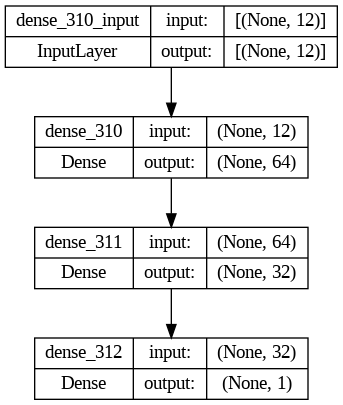

In [ ]:
# Show the network architecture
plot_model(model1, to_file='network_architecture1.png', show_shapes=True, show_layer_names=True)

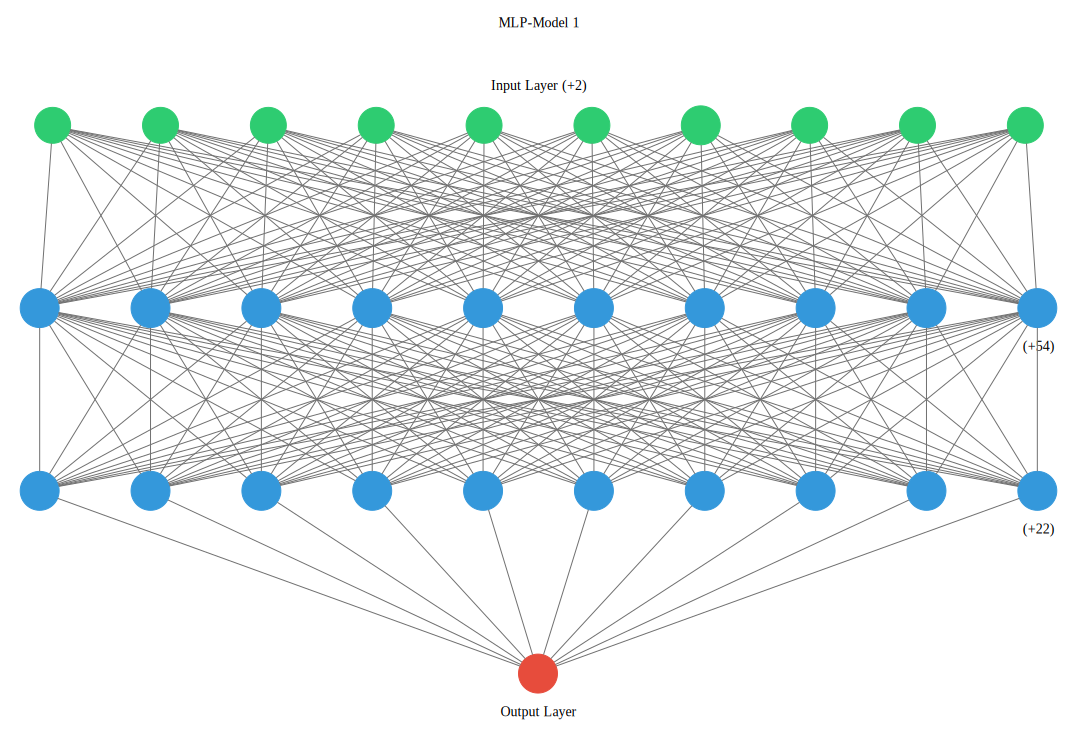

In [ ]:
# Show the network architecture
ann_viz(model1, filename="MLP1_model.gv", title="MLP-Model 1")

graphfile1=graphviz.Source.from_file("MLP1_model.gv")
graphfile1

In [ ]:
# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model1.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Compile model1
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train with training set
historymodel1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)


Epoch 1/30
107/107 [==============================] - 2s 5ms/step - loss: 0.4893 - accuracy: 0.7424 - val_loss: 0.3283 - val_accuracy: 0.8873
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9650 - val_loss: 0.1082 - val_accuracy: 0.9836
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9865 - val_loss: 0.0661 - val_accuracy: 0.9859
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9888 - val_loss: 0.0525 - val_accuracy: 0.9859
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9888 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9903 - val_loss: 0.0413 - val_accuracy: 0.9894
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9897 - val_loss: 0.0383 - val_accuracy: 0.9906
Epoch 

In [ ]:
# Predict the labels for the validation data
# Evaluate with validation set
y_pred_model1=np.round(model1.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
# Cheeck the first 5 predicted labels
y_pred_model1[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Evaluate with validation set and training set
valloss_model1, valacc_model1 = model1.evaluate(X_val, y_val, verbose=0)
trainloss_model1, trainacc_model1 = model1.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy   :", trainacc_model1)
print("Training Loss       :", trainloss_model1)
print("Validation Accuracy :", valacc_model1)
print("Validation Loss     :", valloss_model1)

Training Accuracy   : 0.9955934286117554
Training Loss       : 0.019536539912223816
Validation Accuracy : 0.9941314458847046
Validation Loss     : 0.023530028760433197


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          637          3
TRUE: Red              2        210


Axes(0.125,0.11;0.62x0.77)


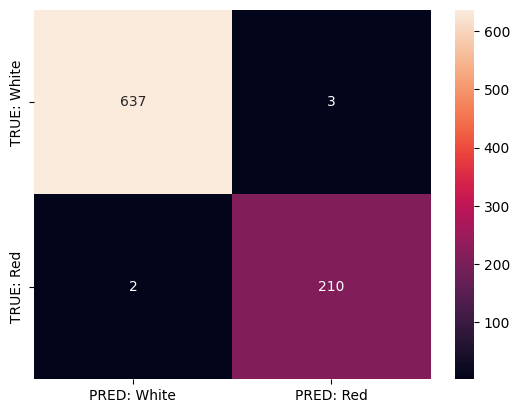

In [ ]:
#Evaluate with validation set
#Confusion matrix
cm_model1=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_model1, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_model1)

# Plot the confusion matrix 
print("\n")
print(sns.heatmap(cm_model1, annot=True, fmt="d"))

In [ ]:
# Evaluate with validation set
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_model1))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       212
           1       1.00      1.00      1.00       640

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



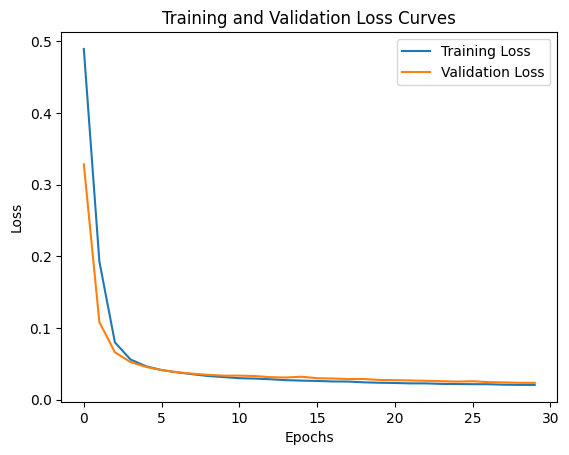

In [ ]:
# Plot the training/validation loss curves
plt.plot(historymodel1.history['loss'], label='Training Loss')
plt.plot(historymodel1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

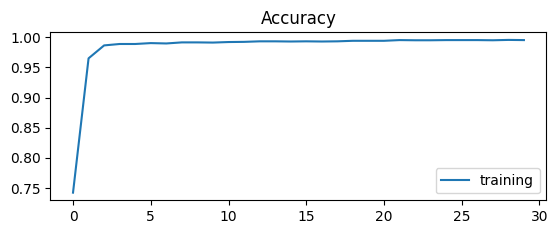

In [ ]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(historymodel1.history['accuracy'], label='training')
pyplot.legend()

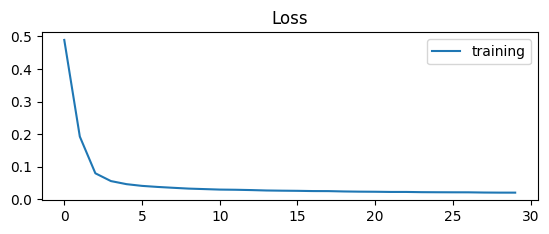

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historymodel1.history['loss'], label='training')
pyplot.legend()

Both the training and validation loss are converged. We can observe that the training loss curve and validation loss decreases and reaches a steady rate as the epoch increase. The two curve overlaps each other at a stable rate showing that it generalize well and performs almost the same. The loss values are also relatively low indicating it is performing well. Therefore, it seems to have a good fit.

# **Model 2**

Second Neural Network Architecture

1.  Activation function : ReLu
2.  Number of Hidden Layers : 2
3.  Number of Neural Network: [12,64,32,1]
4.  Optimizer : Adam
5.  Learning rate : 0.001

In [ ]:
model2 = Sequential()

# Add first hidden layer
model2.add(Dense(64, activation='relu', input_shape=(12,)))

# Add second hidden layer
model2.add(Dense(32,activation='relu'))

# Add an output layer
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_313 (Dense)           (None, 64)                832       
                                                                 
 dense_314 (Dense)           (None, 32)                2080      
                                                                 
 dense_315 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


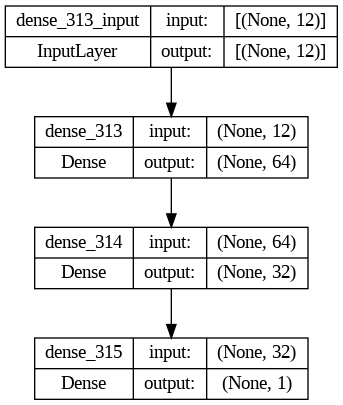

In [ ]:
# Show the network architecture
plot_model(model2, to_file='network_architectur2.png', show_shapes=True, show_layer_names=True)

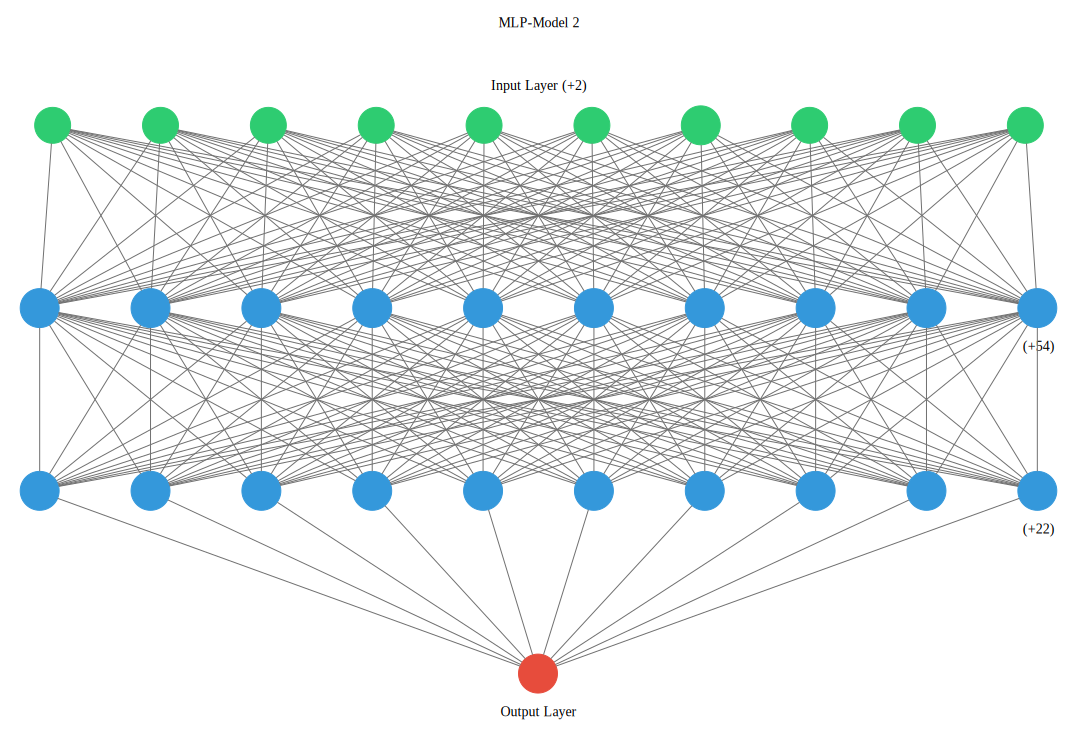

In [ ]:
# Show the network architecture
ann_viz(model2, filename="MLP2_model.gv", title="MLP-Model 2")

graphfile2=graphviz.Source.from_file("MLP2_model.gv")
graphfile2

In [ ]:
# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Train with training set
historymodel2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 6ms/step - loss: 0.1837 - accuracy: 0.9412 - val_loss: 0.0546 - val_accuracy: 0.9883
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9897 - val_loss: 0.0391 - val_accuracy: 0.9930
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9929 - val_loss: 0.0337 - val_accuracy: 0.9941
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9941 - val_loss: 0.0297 - val_accuracy: 0.9941
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 0.0264 - val_accuracy: 0.9965
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9962 - val_loss: 0.0253 - val_accuracy: 0.9953
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9962 - val_loss: 0.0252 - val_accuracy: 0.9941
Epoch 

In [ ]:
# Predict the labels for the validation data
# Evaluate with validation set
y_pred_model2=np.round(model2.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
# Cheeck the first 5 predicted labels
y_pred_model2[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Evaluate with validation set and training set
valloss_model2, valacc_model2 = model2.evaluate(X_val, y_val, verbose=0)
trainloss_model2, trainacc_model2 = model2.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy   :", trainacc_model2)
print("Training Loss       :", trainloss_model2)
print("Validation Accuracy :", valacc_model2)
print("Validation Loss     :", valloss_model2)

Training Accuracy   : 0.9997062087059021
Training Loss       : 0.0011504851281642914
Validation Accuracy : 0.9976525902748108
Validation Loss     : 0.02752225659787655


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          639          1
TRUE: Red              1        211


Axes(0.125,0.11;0.62x0.77)


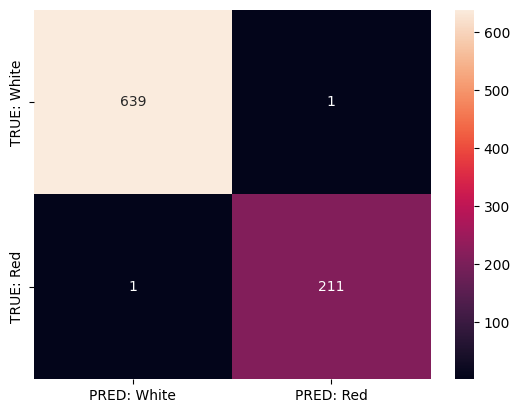

In [ ]:
# Evaluate with validation set
# Confusion matrix
cm_model2=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_model2, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_model2)

# Plot the confusion matrix 
print("\n")
print(sns.heatmap(cm_model2, annot=True, fmt="d"))

In [ ]:
# Evaluate with validation set
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_model2))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



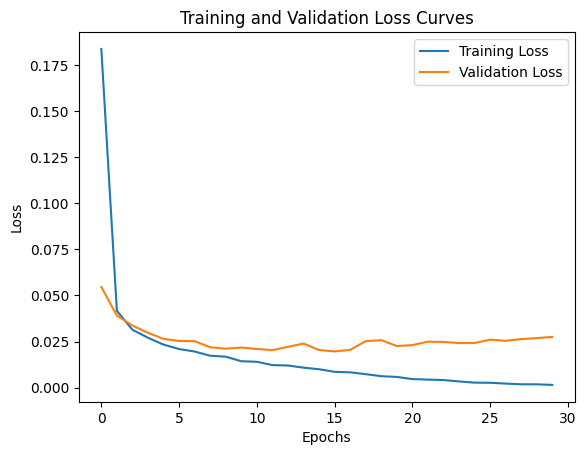

In [ ]:
# Plot the training/validation loss curves
plt.plot(historymodel2.history['loss'], label='Training Loss')
plt.plot(historymodel2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

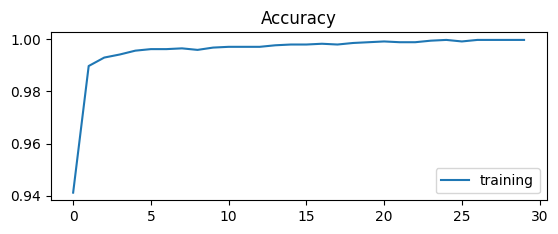

In [ ]:
# Plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(historymodel2.history['accuracy'], label='training')
pyplot.legend()

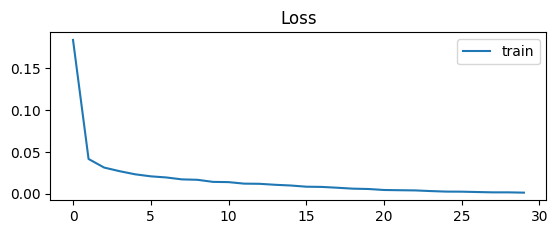

In [ ]:
# Plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historymodel2.history['loss'], label='train')
pyplot.legend()

Both the training and validation loss are converged. We can observe that the training loss curve decreases while the validation loss curve decrease then increases as the epoch increase. This might indicate overfitting as the training goes well but the validation does not and the gap between them becomes bigger.

# **Model 3**

Third Neural Network Architecture

1.  Activation function : Tanh
2.  Number of Hidden Layers : 2
3.  Number of Neural Network: [12,64,32,1]
4.  Optimizer : Adam
5.  Learning rate : 0.001

In [ ]:
model3 = Sequential()

# Add first hidden layer
model3.add(Dense(64, activation='tanh', input_shape=(12,)))

# Add second hidden layer
model3.add(Dense(32,activation='tanh'))

# Add an output layer
model3.add(Dense(1,activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_345 (Dense)           (None, 64)                832       
                                                                 
 dense_346 (Dense)           (None, 32)                2080      
                                                                 
 dense_347 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


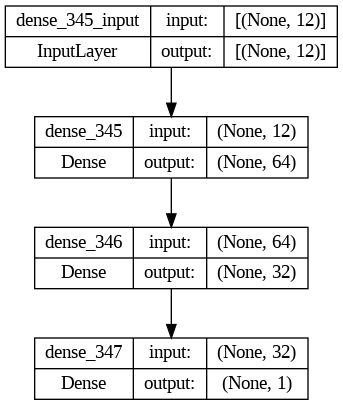

In [ ]:
# Show the network architecture
plot_model(model3, to_file='network_architectur3.png', show_shapes=True, show_layer_names=True)

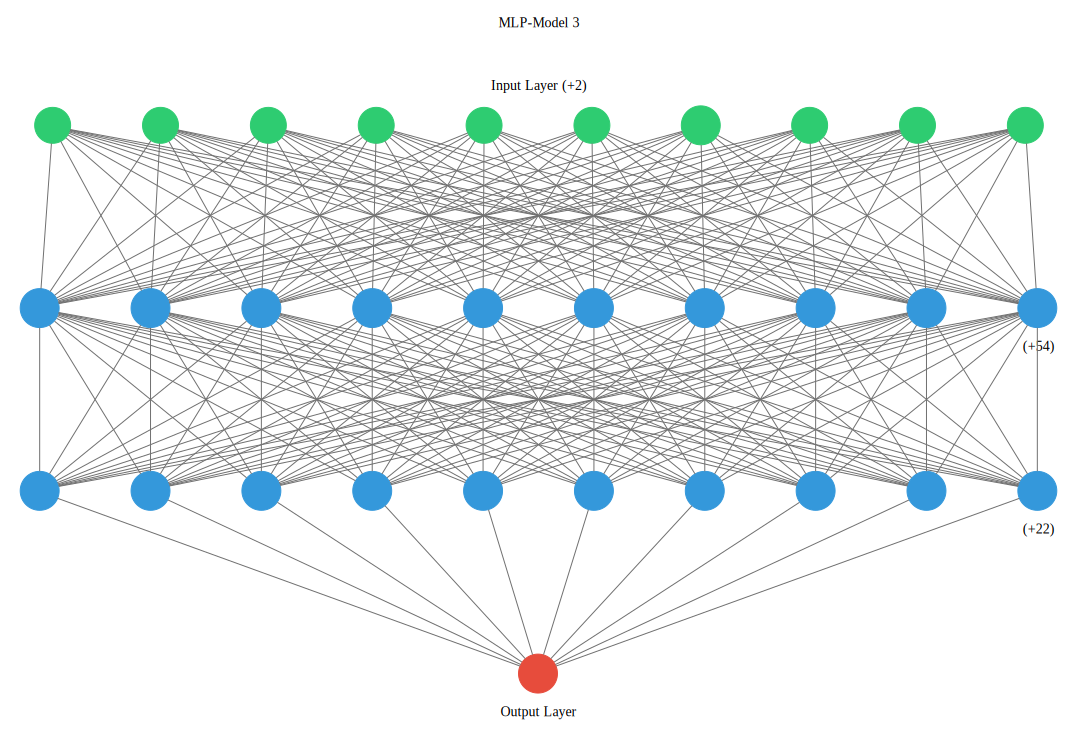

In [ ]:
# Show the network architecture
ann_viz(model3, filename="MLP3_model.gv", title="MLP-Model 3")

graphfile3=graphviz.Source.from_file("MLP3_model.gv")
graphfile3

In [ ]:
# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Train with training set
historymodel3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.1973 - accuracy: 0.9310 - val_loss: 0.0611 - val_accuracy: 0.9836
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9888 - val_loss: 0.0414 - val_accuracy: 0.9894
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9912 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9924 - val_loss: 0.0330 - val_accuracy: 0.9930
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9932 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9929 - val_loss: 0.0291 - val_accuracy: 0.9941
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9947 - val_loss: 0.0274 - val_accuracy: 0.9941
Epoch 

In [ ]:
# Predict the labels for the validation data
# Evaluate with validation set
y_pred_model3=np.round(model3.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
# Cheeck the first 5 predicted labels
y_pred_model3[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Evaluate with validation set and training set
valloss_model3, valacc_model3 = model3.evaluate(X_val, y_val, verbose=0)
trainloss_model3, trainacc_model3 = model3.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy   :", trainacc_model3)
print("Training Loss       :", trainloss_model3)
print("Validation Accuracy :", valacc_model3)
print("Validation Loss     :", valloss_model3)

Training Accuracy   : 0.9979435801506042
Training Loss       : 0.006887037307024002
Validation Accuracy : 0.998826265335083
Validation Loss     : 0.017370326444506645


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          640          0
TRUE: Red              1        211


Axes(0.125,0.11;0.62x0.77)


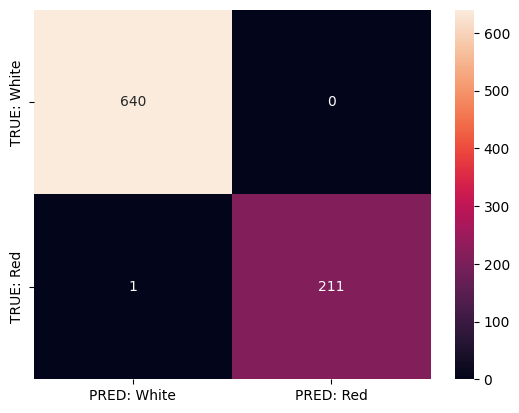

In [ ]:
# Evaluate with validation set
# Confusion matrix
cm_model3=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_model3, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_model3)

# Plot the confusion matrix 
print("\n")
print(sns.heatmap(cm_model3, annot=True, fmt="d"))

In [ ]:
# Evaluate with validation set
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_model3))

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



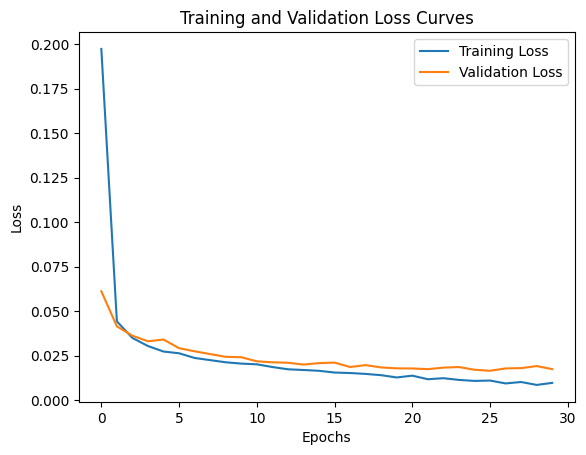

In [ ]:
# Plot the training/validation loss curves
plt.plot(historymodel3.history['loss'], label='Training Loss')
plt.plot(historymodel3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

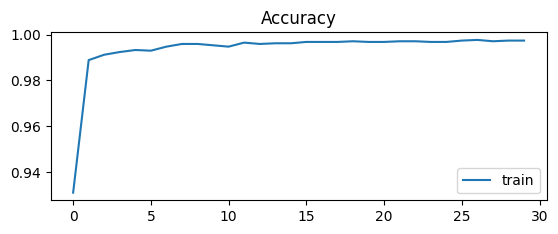

In [ ]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(historymodel3.history['accuracy'], label='train')
pyplot.legend()

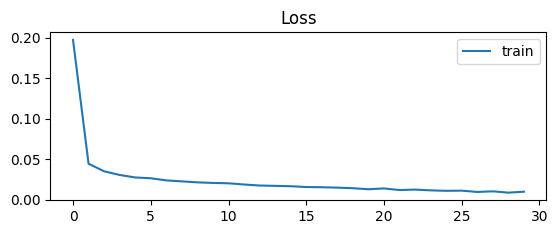

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(historymodel3.history['loss'], label='train')
pyplot.legend()

Both the training and validation loss are converged.
The training loss and validation loss are low and slightly close to each other. This mild difference indicates that the model is best fit.
The training loss decreases rapidly and converges to a low value at the beginning, this means that the model is learning efficiently from the data.
The lower validation loss implies better generalization performance on unseen data. We can observe that the training loss continuosly decrease as the epoch increase while the validation loss decrease and approximately flattens at epoch=15. 

# **Model 4**

Fourth Neural Network Architecture

1.  Activation function : Sigmoid
2.  Number of Hidden Layers : 3
3.  Number of Neural Network: [12,128,64,32,1]
4.  Optimizer : Adam
5.  Learning rate : 0.001

In [ ]:
model4 = Sequential()

# Add first hidden layer
model4.add(Dense(128, activation='sigmoid', input_shape=(12,)))

# Add second hidden layer
model4.add(Dense(64,activation='sigmoid'))

# Add third hidden layer
model4.add(Dense(32,activation='sigmoid'))

# Add an output layer
model4.add(Dense(1,activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_319 (Dense)           (None, 128)               1664      
                                                                 
 dense_320 (Dense)           (None, 64)                8256      
                                                                 
 dense_321 (Dense)           (None, 32)                2080      
                                                                 
 dense_322 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


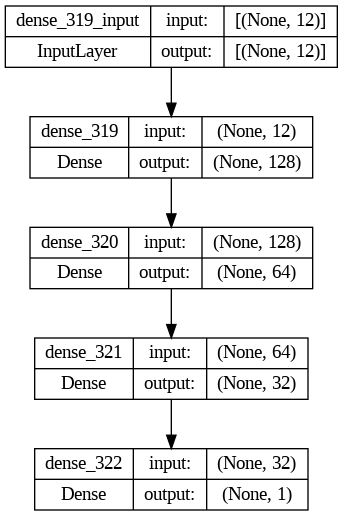

In [ ]:
# Show the network architecture
plot_model(model4, to_file='network_architectur3.png', show_shapes=True, show_layer_names=True)

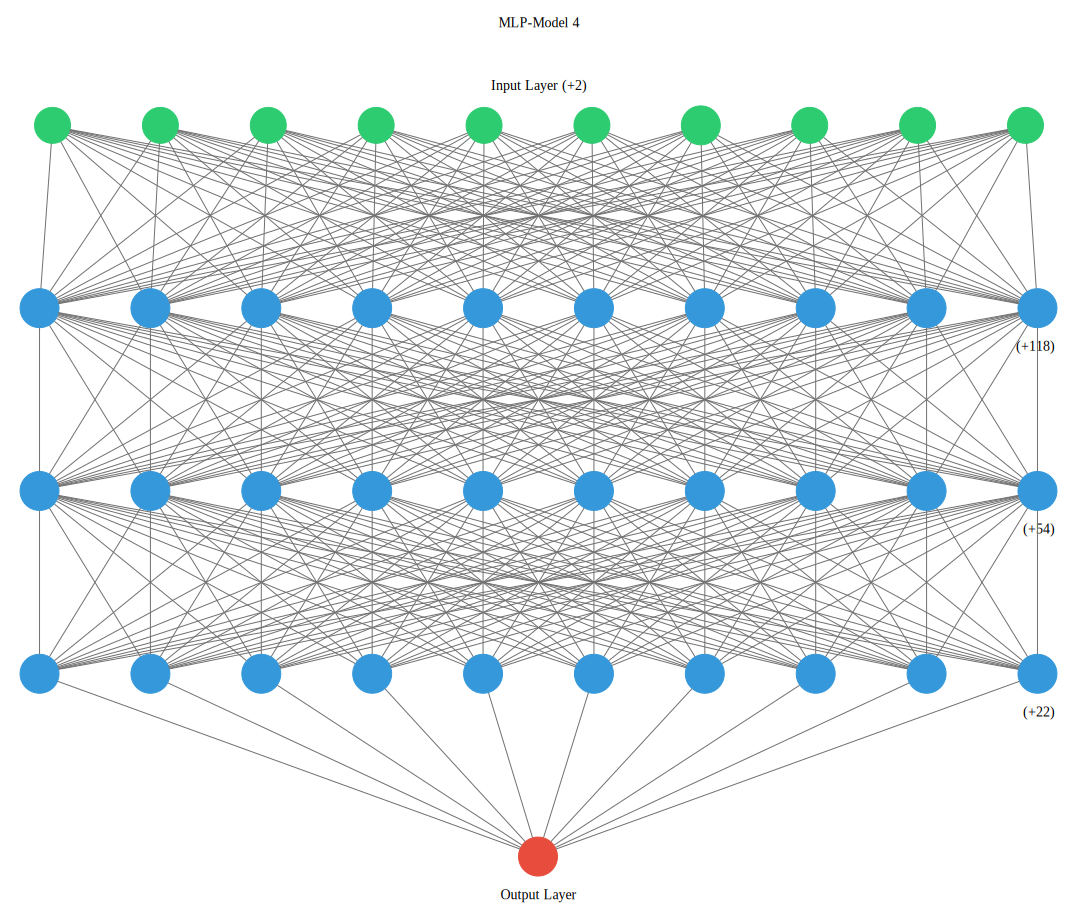

In [ ]:
# Show the network architecture
ann_viz(model4, filename="MLP4_model.gv", title="MLP-Model 4")

graphfile4=graphviz.Source.from_file("MLP4_model.gv")
graphfile4

In [ ]:
# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model4.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Train with training set
historymodel4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 2s 13ms/step - loss: 0.5429 - accuracy: 0.7098 - val_loss: 0.3719 - val_accuracy: 0.8439
Epoch 2/30
107/107 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9706 - val_loss: 0.0752 - val_accuracy: 0.9859
Epoch 3/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9871 - val_loss: 0.0509 - val_accuracy: 0.9871
Epoch 4/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9900 - val_loss: 0.0455 - val_accuracy: 0.9883
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9903 - val_loss: 0.0401 - val_accuracy: 0.9894
Epoch 6/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9912 - val_loss: 0.0336 - val_accuracy: 0.9930
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9924 - val_loss: 0.0332 - val_accuracy: 0.9930
Epoch

In [ ]:
# Predict the labels for the validation data
# Evaluate with validation set
y_pred_model4=np.round(model4.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
y_pred_model4[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Evaluate with validation set
# Accuracy
valloss_model4, valacc_model4 = model4.evaluate(X_val, y_val, verbose=0)
trainloss_model4, trainacc_model4 = model4.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy   :", trainacc_model4)
print("Training Loss       :", trainloss_model4)
print("Validation Accuracy :", valacc_model4)
print("Validation Loss     :", valloss_model4)

Training Accuracy   : 0.9958872199058533
Training Loss       : 0.01917719654738903
Validation Accuracy : 0.9976525902748108
Validation Loss     : 0.02070925198495388


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          640          0
TRUE: Red              2        210


Axes(0.125,0.11;0.62x0.77)


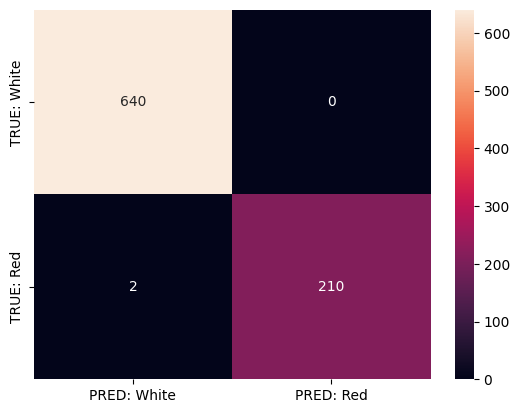

In [ ]:
# Evaluate with validation set
# Confusion matrix
cm_model4=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_model4, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_model4)

# Plot the confusion matrix 
print("\n")
print(sns.heatmap(cm_model4, annot=True, fmt="d"))

In [ ]:
# Evaluate with validation set
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_model4))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



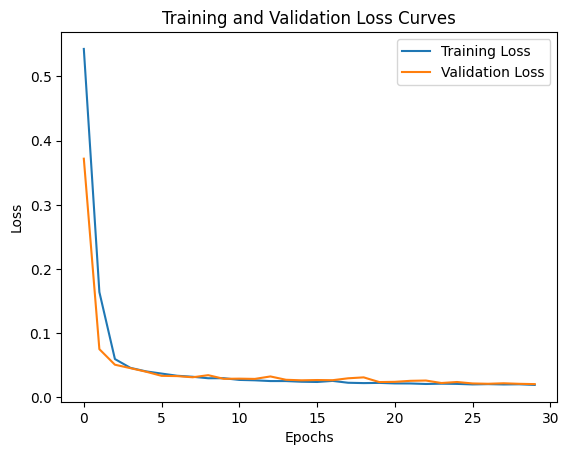

In [ ]:
# Plot the training/validation loss curves
plt.plot(historymodel4.history['loss'], label='Training Loss')
plt.plot(historymodel4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

We can observe that the training and validation loss curve decreases and reach a stable state as the epoch increase. The gap between the training loss curve and validation loss curve is relatively small indicating generalization is well. The loss of both validation and training are relatively low too. It shows that the model is performing well. It is considered a good fit.

# **Model 5**

Fifth Neural Network Architecture

1.  Activation function : ReLu
2.  Number of Hidden Layers : 3
3.  Number of Neural Network: [12,128,64,32,1]

In [ ]:
model5 = Sequential()

# Add first hidden layer
model5.add(Dense(128, activation='relu', input_shape=(12,)))

# Add second hidden layer
model5.add(Dense(64,activation='relu'))

# Add third hidden layer
model5.add(Dense(32,activation='relu'))

# Add an output layer
model5.add(Dense(1,activation='sigmoid'))

In [ ]:
model5.summary()

Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_323 (Dense)           (None, 128)               1664      
                                                                 
 dense_324 (Dense)           (None, 64)                8256      
                                                                 
 dense_325 (Dense)           (None, 32)                2080      
                                                                 
 dense_326 (Dense)           (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


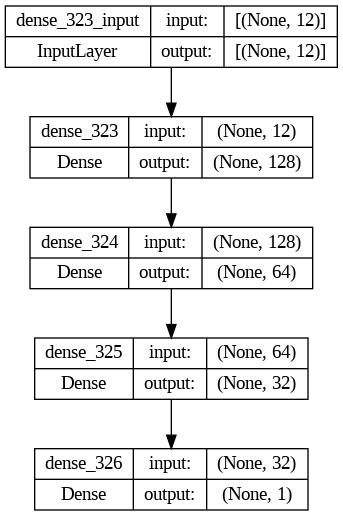

In [ ]:
# Show the network architecture
plot_model(model5, to_file='network_architectur3.png', show_shapes=True, show_layer_names=True)

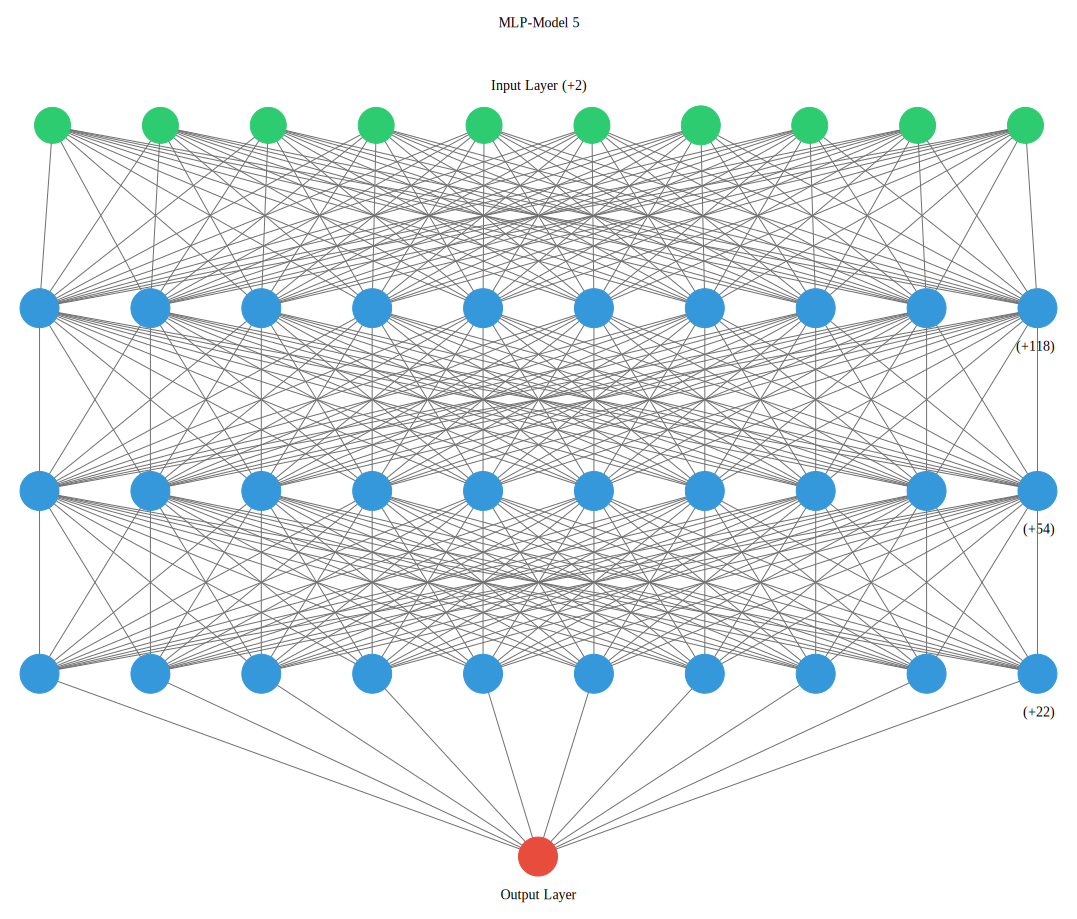

In [ ]:
# Show the network architecture
ann_viz(model5, filename="MLP5_model.gv", title="MLP-Model 5")

graphfile5=graphviz.Source.from_file("MLP5_model.gv")
graphfile5

In [ ]:
# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model5.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Train with training set
historymodel5 = model5.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 6ms/step - loss: 0.1552 - accuracy: 0.9368 - val_loss: 0.0496 - val_accuracy: 0.9883
Epoch 2/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0317 - accuracy: 0.9921 - val_loss: 0.0344 - val_accuracy: 0.9930
Epoch 3/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.9932 - val_loss: 0.0283 - val_accuracy: 0.9953
Epoch 4/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9953 - val_loss: 0.0256 - val_accuracy: 0.9953
Epoch 5/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9965 - val_loss: 0.0309 - val_accuracy: 0.9918
Epoch 6/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0237 - val_accuracy: 0.9953
Epoch 7/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.0196 - val_accuracy: 0.9977
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_model5=np.round(model5.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
y_pred_model5[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# Evaluate with validation set
# Accuracy
valloss_model5, valacc_model5 = model5.evaluate(X_val, y_val, verbose=0)
trainloss_model5, trainacc_model5 = model5.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy   :", trainacc_model5)
print("Training Loss       :", trainloss_model5)
print("Validation Accuracy :", valacc_model5)
print("Validation Loss     :", valloss_model5)

Training Accuracy   : 1.0
Training Loss       : 8.422131213592365e-05
Validation Accuracy : 0.9976525902748108
Validation Loss     : 0.03159329295158386


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          640          0
TRUE: Red              2        210


Axes(0.125,0.11;0.62x0.77)


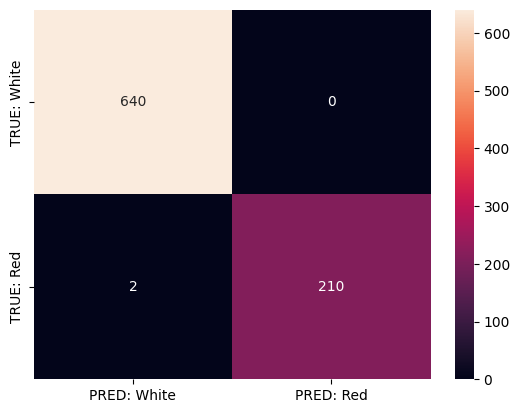

In [ ]:
# Evaluate with validation set
# Confusion matrix
cm_model5=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_model5, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_model5)

# Plot the confusion matrix 
print("\n")
print(sns.heatmap(cm_model5, annot=True, fmt="d"))

In [ ]:
# Evaluate with validation set
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_model5))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



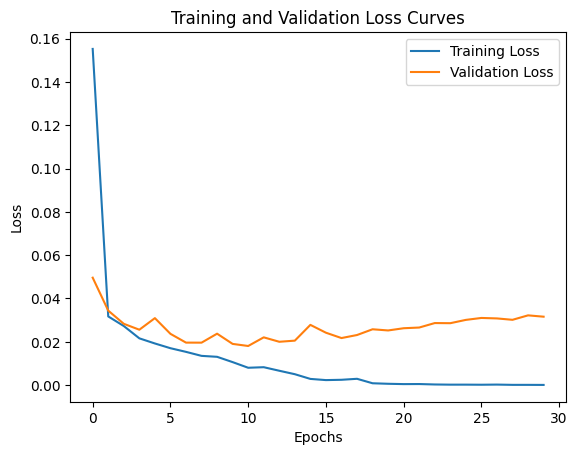

In [ ]:
# Plot the training/validation loss curves
plt.plot(historymodel5.history['loss'], label='Training Loss')
plt.plot(historymodel5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Based on the validation and loss curve which is observed above, we find that both training and validation loss curve are both uneven and jagged. Thus, model 5 is considered overfitting.

This may due to the high complexity of the model. Since this model has 3 hidden layers, hidden layer 1 has 128 nodes, hidden layer 2 has 64 nodes and hidden layer 3 with 32 nodes, and all these 3 hidden layers used the activation function of relu. 
 Although the activation function might be suited for this dataset, however the number of hidden layers maybe too complex for this dataset. This will make the model more complex.

# **Model Tuning**


> Choose the best model architecture based on Step 2 and perform 
hyperparameter tuning. Justify the reason on how you decide the best model. Identify 
the hyperparameters you wish to tune (e.g activation function, learning rate, optimizer 
etc). Perform a systematic analysis to analyse the performance of the identified model
with different hyperparameters. Report your results in a table. 



Best model:

First neural network architecture

1.  Activation function : Sigmoid
2.  Number of Hidden Layers : 2
3.  Number of Neural Network: [12,64,32,1]

Reasons:
> High validation accuracy, it indicates that the model performs very well on the validation set. A high validation accuracy suggests that the model is able to make accurate predictions on unseen data.


Justifications:
1.  Activation Function: Sigmoid

> The choice of the sigmoid activation function might be suitable for the specific problem or dataset being addressed. Sigmoid activation function maps the output of each neuron to a range between 0 and 1, which can be useful for binary classification problems where the output is interpreted as a probability.

2.  Number of Hidden Layers: 2

> Having two hidden layers allows for more complex representations and transformations of the input data. Deeper architectures with more hidden layers can capture higher-level features and patterns in the data. However, the optimal number of hidden layers depends on the complexity of the problem and the amount of available data. More layers also increase the risk of overfitting if not properly regularized.

3.  Number of Neural Network: [12, 64, 32, 1]

> The specific configuration of neurons in the layers ([12, 64, 32, 1]) indicates the number of neurons in each layer, including the input and output layers. The input layer has 12 neurons, which suggests that the model takes in 12 features as input. The presence of 64 and 32 neurons in the hidden layers indicates the capacity of the model to capture more complex relationships in the data. The output layer has 1 neuron, indicating that the model is designed for binary classification tasks.

# **Hyperparameter Tuning**

# **Hyperparameter Tuning 1**

Optimizer = Adam

Learning rate = 0.001

Activation function = ReLu

In [ ]:
#Initialize constructor 
m1=Sequential()

#Add first hidden layer
m1.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m1.add(Dense(8,activation='relu'))

#add an output layer
m1.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train with training set
historym1 = m1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)


Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.5378 - accuracy: 0.7524 - val_loss: 0.2613 - val_accuracy: 0.9648
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.9747 - val_loss: 0.1178 - val_accuracy: 0.9789
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9824 - val_loss: 0.0751 - val_accuracy: 0.9836
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9853 - val_loss: 0.0567 - val_accuracy: 0.9883
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9885 - val_loss: 0.0495 - val_accuracy: 0.9883
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9894 - val_loss: 0.0457 - val_accuracy: 0.9894
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9906 - val_loss: 0.0435 - val_accuracy: 0.9894
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_m1=np.round(m1.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate with validation set
# Accuracy
valloss_m1, valacc_m1 = m1.evaluate(X_val, y_val, verbose=0)
trainloss_m1, trainacc_m1 = m1.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m1)
print("Train Loss          :", trainloss_m1)
print("Validation Accuracy :", valacc_m1)
print("Validation Loss     :", valloss_m1)

Train Accuracy      : 0.9961809515953064
Train Loss          : 0.016780169680714607
Validation Accuracy : 0.9929577708244324
Validation Loss     : 0.02803143672645092


In [ ]:
# Get classifictaion report
report1 = classification_report(y_val, y_pred_m1, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision1 = report1['weighted avg']['precision']
recall1 = report1['weighted avg']['recall']
f1_score1 = report1['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       212
           1       0.99      1.00      1.00       640

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



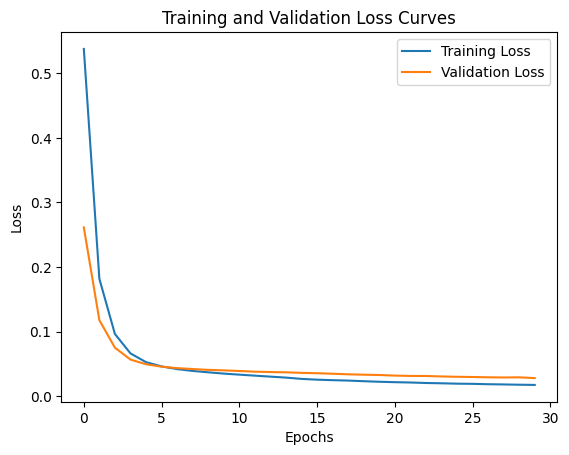

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym1.history['loss'], label='Training Loss')
plt.plot(historym1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Hyperparameter Tuning 2**

Optimizer = Adam

Learning Rate = 0.0015

Activation function = ReLu

In [ ]:
#Initialize constructor 
m2=Sequential()

#Add first hidden layer
m2.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m2.add(Dense(8,activation='relu'))

#add an output layer
m2.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.0015
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train with training set
historym2 = m2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.5564 - accuracy: 0.6863 - val_loss: 0.1993 - val_accuracy: 0.9742
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9806 - val_loss: 0.0771 - val_accuracy: 0.9847
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9874 - val_loss: 0.0570 - val_accuracy: 0.9859
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9891 - val_loss: 0.0466 - val_accuracy: 0.9871
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9915 - val_loss: 0.0409 - val_accuracy: 0.9894
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9918 - val_loss: 0.0375 - val_accuracy: 0.9930
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9935 - val_loss: 0.0348 - val_accuracy: 0.9930
Epoch 

In [ ]:
#Evaluate with validation set
y_pred_m2=np.round(m2.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
#Evaluate with validation set
#Accuracy
valloss_m2, valacc_m2 = m2.evaluate(X_val, y_val, verbose=0)
trainloss_m2, trainacc_m2 = m2.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m2)
print("Train Loss          :", trainloss_m2)
print("Validation Accuracy :", valacc_m2)
print("Validation Loss     :", valloss_m2)

Train Accuracy      : 0.9970622658729553
Train Loss          : 0.012249219231307507
Validation Accuracy : 0.9976525902748108
Validation Loss     : 0.018571628257632256


In [ ]:
# Get classifictaion report
report2 = classification_report(y_val, y_pred_m2, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision2 = report2['weighted avg']['precision']
recall2 = report2['weighted avg']['recall']
f1_score2 = report2['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



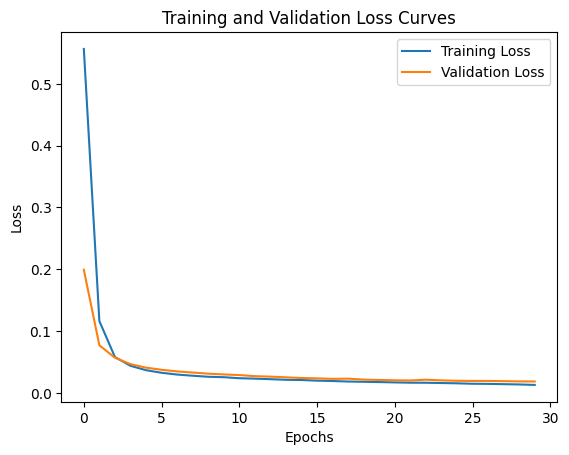

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym2.history['loss'], label='Training Loss')
plt.plot(historym2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Hyperparameter Tuning 3**

Optimizer = RMSProp

Learning Rate = 0.001

Activation function = ReLu

In [ ]:
#Initialize constructor 
m3=Sequential()

#Add first hidden layer
m3.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m3.add(Dense(8,activation='relu'))

#add an output layer
m3.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Train with training set
historym3 = m3.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 5ms/step - loss: 0.6407 - accuracy: 0.6630 - val_loss: 0.5361 - val_accuracy: 0.7547
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8320 - val_loss: 0.2565 - val_accuracy: 0.9378
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9706 - val_loss: 0.0955 - val_accuracy: 0.9800
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9833 - val_loss: 0.0556 - val_accuracy: 0.9859
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9874 - val_loss: 0.0470 - val_accuracy: 0.9883
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0426 - val_accuracy: 0.9906
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9894 - val_loss: 0.0401 - val_accuracy: 0.9906
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_m3=np.round(m3.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate with validation set
# Accuracy
valloss_m3, valacc_m3 = m3.evaluate(X_val, y_val, verbose=0)
trainloss_m3, trainacc_m3 = m3.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m3)
print("Train Loss          :", trainloss_m3)
print("Validation Accuracy :", valacc_m3)
print("Validation Loss     :", valloss_m3)

Train Accuracy      : 0.9958872199058533
Train Loss          : 0.019832756370306015
Validation Accuracy : 0.9953051805496216
Validation Loss     : 0.02681308425962925


In [ ]:
# Get classifictaion report
report3 = classification_report(y_val, y_pred_m3, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision3 = report3['weighted avg']['precision']
recall3 = report3['weighted avg']['recall']
f1_score3 = report3['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       0.99      0.99      0.99       852
weighted avg       1.00      1.00      1.00       852



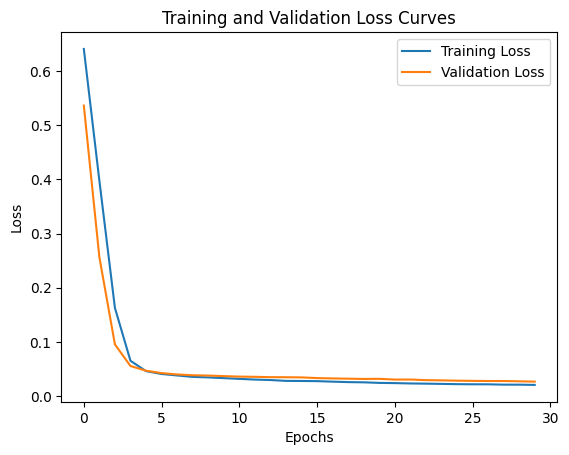

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym3.history['loss'], label='Training Loss')
plt.plot(historym3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Hyperparameter Tuning 4**

Optimizer = RMSProp

Learning Rate = 0.0005

Activation function = ReLu

In [ ]:
#Initialize constructor 
m4=Sequential()

#Add first hidden layer
m4.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m4.add(Dense(8,activation='relu'))

#add an output layer
m4.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.0005
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train with training set
historym4 = m4.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 2s 5ms/step - loss: 0.5031 - accuracy: 0.7500 - val_loss: 0.4368 - val_accuracy: 0.7805
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8058 - val_loss: 0.3200 - val_accuracy: 0.8533
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9063 - val_loss: 0.2156 - val_accuracy: 0.9437
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.9645 - val_loss: 0.1474 - val_accuracy: 0.9730
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9812 - val_loss: 0.1053 - val_accuracy: 0.9824
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9856 - val_loss: 0.0794 - val_accuracy: 0.9847
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9871 - val_loss: 0.0647 - val_accuracy: 0.9871
Epoch 

In [ ]:
#Evaluate with validation set
y_pred_m4=np.round(m4.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
#Evaluate with validation set
#Accuracy
valloss_m4, valacc_m4 = m4.evaluate(X_val, y_val, verbose=0)
trainloss_m4, trainacc_m4 = m4.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m4)
print("Train Loss          :", trainloss_m4)
print("Validation Accuracy :", valacc_m4)
print("Validation Loss     :", valloss_m4)

Train Accuracy      : 0.9958872199058533
Train Loss          : 0.02289625070989132
Validation Accuracy : 0.9917840361595154
Validation Loss     : 0.03615102916955948


In [ ]:
# Get classifictaion report
report4 = classification_report(y_val, y_pred_m4, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision4 = report4['weighted avg']['precision']
recall4 = report4['weighted avg']['recall']
f1_score4 = report4['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       1.00      0.99      0.99       640

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



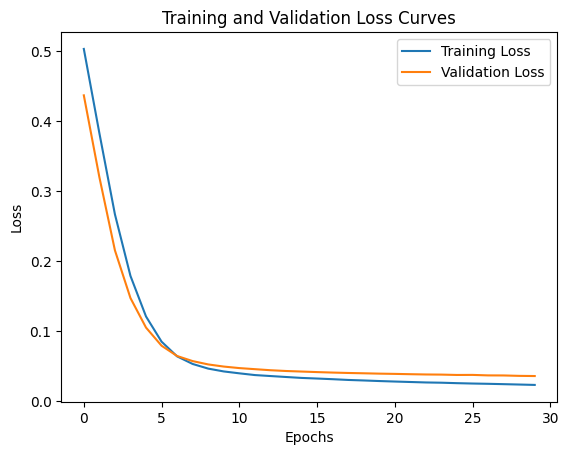

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym4.history['loss'], label='Training Loss')
plt.plot(historym4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Hyperparameter Tuning 5**

Optimizer = SGD

Learning Rate = 0.017

Activation function = ReLu

In [ ]:
#Initialize constructor 
m5=Sequential()

#Add first hidden layer
m5.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m5.add(Dense(8,activation='relu'))

#add an output layer
m5.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.017
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train with training set
historym5 = m5.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 7ms/step - loss: 0.4501 - accuracy: 0.7826 - val_loss: 0.2717 - val_accuracy: 0.9214
Epoch 2/30
107/107 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9383 - val_loss: 0.1473 - val_accuracy: 0.9460
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9642 - val_loss: 0.1003 - val_accuracy: 0.9671
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9768 - val_loss: 0.0804 - val_accuracy: 0.9695
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9812 - val_loss: 0.0701 - val_accuracy: 0.9765
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9841 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9862 - val_loss: 0.0583 - val_accuracy: 0.9847
Epoch 

In [ ]:
#Evaluate with validation set
y_pred_m5=np.round(m5.predict(X_val))

27/27 [==============================] - 0s 1ms/step


In [ ]:
#Evaluate with validation set
#Accuracy
valloss_m5, valacc_m5 = m5.evaluate(X_val, y_val, verbose=0)
trainloss_m5, trainacc_m5 = m5.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m5)
print("Train Loss          :", trainloss_m5)
print("Validation Accuracy :", valacc_m5)
print("Validation Loss     :", valloss_m5)

Train Accuracy      : 0.9932432174682617
Train Loss          : 0.029104603454470634
Validation Accuracy : 0.9917840361595154
Validation Loss     : 0.03814176842570305


In [ ]:
# Get classifictaion report
report5 = classification_report(y_val, y_pred_m5, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision5 = report5['weighted avg']['precision']
recall5 = report5['weighted avg']['recall']
f1_score5 = report5['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       1.00      0.99      0.99       640

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



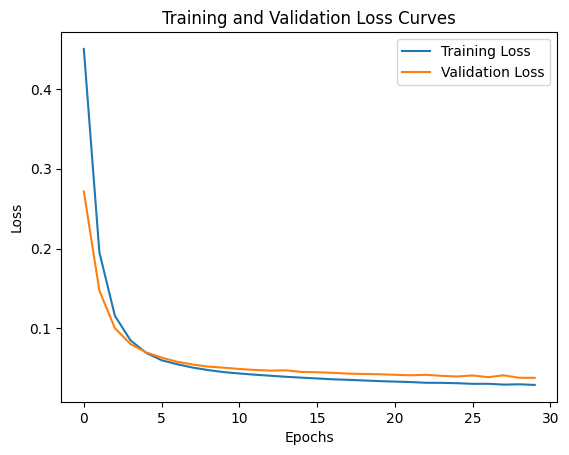

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym5.history['loss'], label='Training Loss')
plt.plot(historym5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Hyperparameter Tuning 6**

Optimizer: SGD

Learning Rate: 0.01

Activation function = ReLu

In [ ]:
#Initialize constructor 
m6=Sequential()

#Add first hidden layer
m6.add(Dense(10, activation='relu', input_shape=(12,)))

#Add second hidden layer
m6.add(Dense(8,activation='relu'))

#add an output layer
m6.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the specified learning rate
m6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train with training set
historym6 =m6.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=30, batch_size=32, verbose=1)

Epoch 1/30
107/107 [==============================] - 1s 6ms/step - loss: 0.6146 - accuracy: 0.7171 - val_loss: 0.3928 - val_accuracy: 0.8815
Epoch 2/30
107/107 [==============================] - 0s 4ms/step - loss: 0.2722 - accuracy: 0.9048 - val_loss: 0.1919 - val_accuracy: 0.9460
Epoch 3/30
107/107 [==============================] - 0s 5ms/step - loss: 0.1501 - accuracy: 0.9615 - val_loss: 0.1217 - val_accuracy: 0.9730
Epoch 4/30
107/107 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9736 - val_loss: 0.0934 - val_accuracy: 0.9730
Epoch 5/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0800 - accuracy: 0.9794 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 6/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9821 - val_loss: 0.0681 - val_accuracy: 0.9824
Epoch 7/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9833 - val_loss: 0.0626 - val_accuracy: 0.9836
Epoch 

In [ ]:
#Evaluate with validation set
y_pred_m6=np.round(m6.predict(X_val))

27/27 [==============================] - 0s 2ms/step


In [ ]:
#Evaluate with validation set
#Accuracy
valloss_m6, valacc_m6 = m6.evaluate(X_val, y_val, verbose=0)
trainloss_m6, trainacc_m6 = m6.evaluate(X_train, y_train, verbose=0)

print("Train Accuracy      :", trainacc_m6)
print("Train Loss          :", trainloss_m6)
print("Validation Accuracy :", valacc_m6)
print("Validation Loss     :", valloss_m6)

Train Accuracy      : 0.9929494857788086
Train Loss          : 0.030746029689908028
Validation Accuracy : 0.9906103014945984
Validation Loss     : 0.04164343327283859


In [ ]:
# Get classifictaion report
report6 = classification_report(y_val, y_pred_m6, output_dict=True)

# Extract precision, recall, and F1 score for each class
precision6 = report6['weighted avg']['precision']
recall6 = report6['weighted avg']['recall']
f1_score6 = report6['weighted avg']['f1-score']

print(classification_report(y_val,y_pred_m6))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       212
           1       0.99      0.99      0.99       640

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



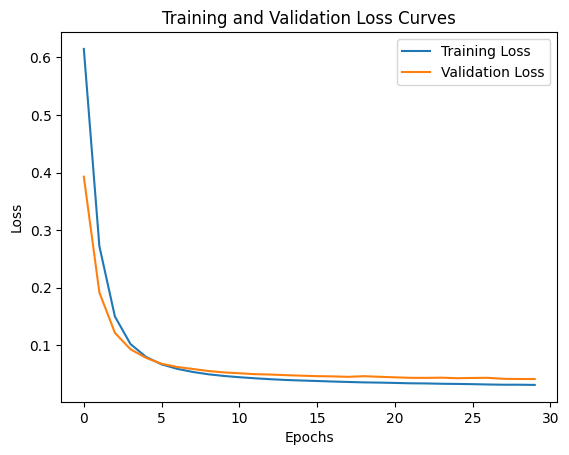

In [ ]:
# Plot the training/validation loss curves
plt.plot(historym6.history['loss'], label='Training Loss')
plt.plot(historym6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# **Report in table**

In [ ]:
# Create Table
col_names=['Hyperparameter Tuning Set','Validation Accuracy','Validation Loss','Training Accuracy','Training Loss']
result=np.array([['1', valacc_m1,valloss_m1,trainacc_m1,trainloss_m1],
                 ['2', valacc_m2,valloss_m2,trainacc_m2,trainloss_m2],
                 ['3', valacc_m3,valloss_m3,trainacc_m3,trainloss_m3],
                 ['4', valacc_m4,valloss_m4,trainacc_m4,trainloss_m4],
                 ['5', valacc_m5,valloss_m5,trainacc_m5,trainloss_m5],
                 ['6', valacc_m6,valloss_m6,trainacc_m6,trainloss_m6],
                 ])

col_names2=['Hyperparameter Tuning Set','Precision','Recall','f1-score']
result2=np.array([['1', precision1,recall1,f1_score1],
                 ['2', precision2,recall2,f1_score2],
                 ['3', precision3,recall3,f1_score3],
                 ['4', precision4,recall4,f1_score4],
                 ['5', precision5,recall5,f1_score5],
                 ['6', precision6,recall6,f1_score6],
                 ])

table1=pd.DataFrame(result,columns=col_names)
table2=pd.DataFrame(result2,columns=col_names2)

display(table1)
print()
display(table2)

Hyperparameter Tuning Set Validation Accuracy       Validation Loss  \
0                         1  0.9929577708244324   0.02803143672645092   
1                         2  0.9976525902748108  0.018571628257632256   
2                         3  0.9953051805496216   0.02681308425962925   
3                         4  0.9917840361595154   0.03615102916955948   
4                         5  0.9917840361595154   0.03814176842570305   
5                         6  0.9906103014945984   0.04164343327283859   

    Training Accuracy         Training Loss  
0  0.9961809515953064  0.016780169680714607  
1  0.9970622658729553  0.012249219231307507  
2  0.9958872199058533  0.019832756370306015  
3  0.9958872199058533   0.02289625070989132  
4  0.9932432174682617  0.029104603454470634  
5  0.9929494857788086  0.030746029689908028

Hyperparameter Tuning Set           Precision              Recall  \
0                         1   0.992950015774815  0.9929577464788732   
1                         2  0.9976598949877875  0.9976525821596244   
2                         3  0.9953051643192489  0.9953051643192489   
3                         4  0.9918548688844884  0.9917840375586855   
4                         5  0.9918005686702375  0.9917840375586855   
5                         6  0.9906103286384976  0.9906103286384976   

             f1-score  
0  0.9929465518517944  
1  0.9976488506172647  
2  0.9953051643192489  
3  0.9918032485536307  
4    0.99179049152725  
5  0.9906103286384976

# **Model Evaluation**



> Using the best model that you have identified in Step 3, evaluate its 
performance on testing data. Compare your validation and testing results using appropriate 
evaluation metrics. Report your observation and discuss the results. 



Best Hyperparameter Tuning Model : Hyperparameter Tuning 2

In [ ]:
bestmodel_tuned = m2

After tuning the hyperparameters which are learning rate, batch size, activation function and optimizer above, based on the accuracy , we can observe that model with:

Learning rate, = 0.001, Batch size = 32, Activation function = Sigmoid, Optimizer = Adam , has the highest validation accuracy.

Thus, the code snippet below we will build and compile the chosen model architecture with the observed hyperparameters above and test them with validation and testing set.

The validation and the testing accuracy is displayed at the end of the code.

# **Evaluation using validation set**

In [ ]:
y_predval_B=np.round(bestmodel_tuned.predict(X_val))
valloss_B, valacc_B = bestmodel_tuned.evaluate(X_val, y_val, verbose=0)

27/27 [==============================] - 0s 1ms/step


# **Evaluation using testing set**

In [ ]:
y_predtest_B=np.round(bestmodel_tuned.predict(X_test))
testloss_B, testacc_B = bestmodel_tuned.evaluate(X_test, y_test, verbose=0)

34/34 [==============================] - 0s 2ms/step


# **Comparison of validation and testing result**

In [ ]:
col_names=['','Validation Set','Testing Set']
result=np.array([['Loss',valloss_B,testloss_B],
                 ['Accuracy',valacc_B,testacc_B],
                 ])

#create table
table=pd.DataFrame(result,columns=col_names)

print("\033[1m -------------------Loss & Accuracy-------------------\033[0m")
#print table
table

 -------------------Loss & Accuracy-------------------


Validation Set           Testing Set
0      Loss  0.018571628257632256  0.034070540219545364
1  Accuracy    0.9976525902748108    0.9943609237670898


--- Confusion Matrix for Validation Set ---

Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          640          0
TRUE: Red              2        210


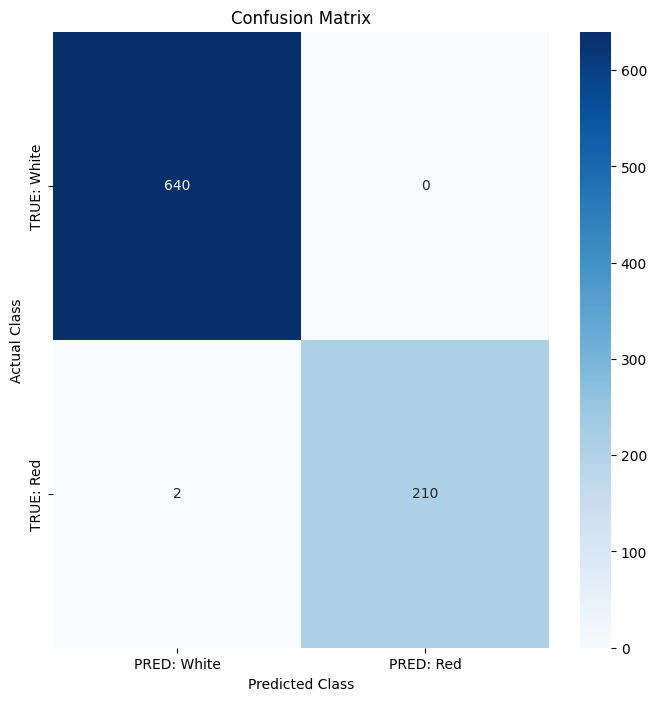


--- Confusion Matrix for Testing Set ---

Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          796          1
TRUE: Red              5        262


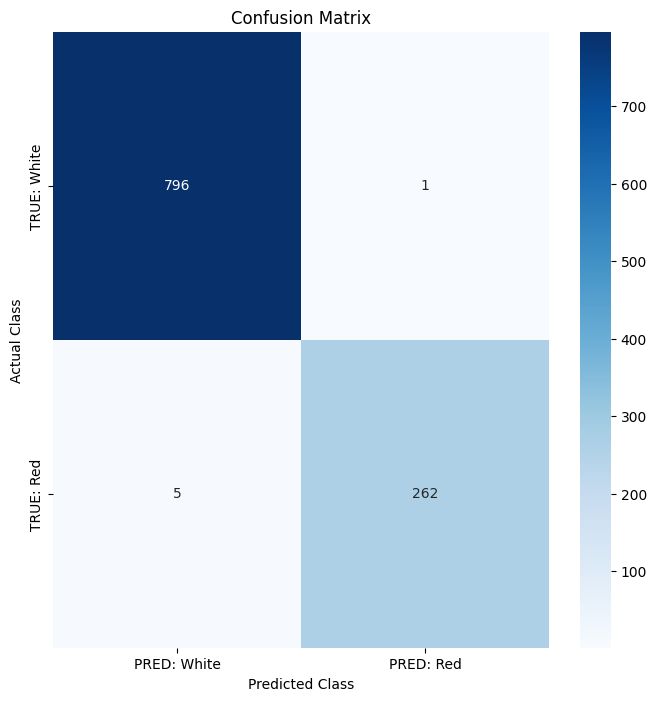

In [ ]:
print("\n\033[1m--- Confusion Matrix for Validation Set ---\033[0m\n")
cm_valB=pd.DataFrame(metrics.confusion_matrix(y_val, y_predval_B, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_valB)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_valB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

print()

print("\033[1m--- Confusion Matrix for Testing Set ---\033[0m\n")
cm_testB=pd.DataFrame(metrics.confusion_matrix(y_test, y_predtest_B, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_testB)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_testB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

In [ ]:
print("\033[1m--------Classification Report for Validation Set--------\033[0m")
print(classification_report(y_val,y_predval_B))
print()
print("\033[1m--------Classification Report for Testing Set---------\033[0m")
print(classification_report(y_test,y_predtest_B))

--------Classification Report for Validation Set--------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           1       1.00      1.00      1.00       640

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852


--------Classification Report for Testing Set---------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       267
           1       0.99      1.00      1.00       797

    accuracy                           0.99      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064



In [ ]:
print("\033[1m--------Accuracy Score for Validation Set--------\033[0m")
print(accuracy_score(y_val,y_predval_B))
print()
print("\033[1m--------Accuracy Score for Testing Set---------\033[0m")
print(accuracy_score(y_test,y_predtest_B))

--------Accuracy Score for Validation Set--------
0.9976525821596244

--------Accuracy Score for Testing Set---------
0.9943609022556391


In [ ]:
# Assuming you have predicted probabilities for the testing and validation sets
y_test_pred_prob = bestmodel_tuned.predict(X_test)
y_val_pred_prob = bestmodel_tuned.predict(X_val)

# Compute the FPR, TPR, and thresholds for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)

# Compute the FPR, TPR, and thresholds for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_prob)


27/27 [==============================] - 0s 3ms/step


In [ ]:
auc_score = roc_auc_score(y_test, y_test_pred_prob)

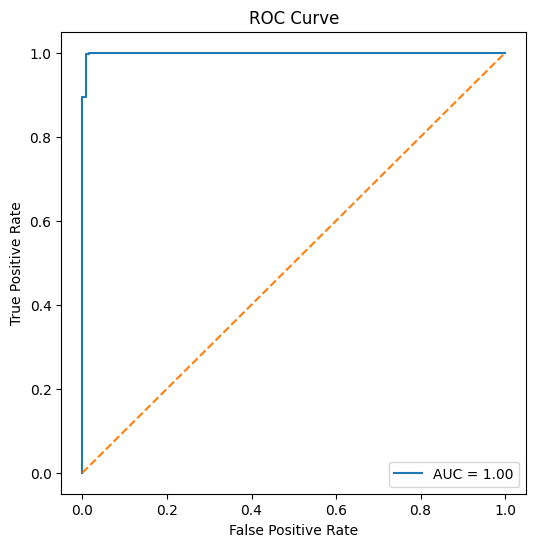

In [ ]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# **Discussion**

**Confusion Matrix**

Validation Set:
In the validation set confusion matrix, we can see that the model made 640 correct predictions for the "White" class and 210 correct predictions for the "Red" class. It made 2 false positive predictions for the "Red" class, but no false positive predictions for the "White" class. This indicates that the model performed exceptionally well on the validation set, achieving high accuracy and precision.

Testing Set:
In the testing set confusion matrix, we observe that the model made 796 correct predictions for the "White" class and 262 correct predictions for the "Red" class. It made 1 false positive prediction for the "Red" class but no false positive predictions for the "White" class. These results show that the model maintained its strong performance on the testing set as well.

The number of correct predictions and false positives for both classes is similar, indicating that the model's performance generalizes well to unseen data.The small number of false positive predictions in both datasets demonstrates the model's ability to accurately distinguish between the "White" and "Red" classes. Overall, the model shows high precision, recall, and accuracy on both the validation and testing sets.

Based on the given confusion matrices, the model appears to be robust and performs well in correctly classifying the wine samples into their respective classes.

**Classification Matrix**

Based on these results, the model appears to be performing exceptionally well on both the validation and testing sets. It demonstrates high precision, recall, and F1-scores for both classes, as well as a high overall accuracy. These metrics indicate that the model is effectively distinguishing between the two classes and making accurate predictions.

**Accuracy**

Validation Set:
The accuracy score for the validation set is 0.9977, indicating that the model achieved a high level of accuracy in predicting the class labels for the validation data. This means that 99.77% of the samples in the validation set were classified correctly by the model.

Testing Set:
The accuracy score for the testing set is 0.9944, which is slightly lower than the accuracy score for the validation set. However, it still demonstrates excellent performance, with 99.44% of the samples in the testing set being classified correctly by the model.

Overall, the high accuracy scores obtained for both the validation and testing sets indicate that the model is effective in accurately classifying the wine samples into their respective classes.

Based on the accuracy scores, it can be concluded that the model demonstrates strong predictive capabilities and generalization to unseen data.

**ROC curve and AUC**

ROC (Receiver Operating Characteristic) The top-left corner curve shape of the ROC curve signifies that the model achieves a high true positive rate while keeping the false positive rate low, indicating good performance.

AUC (Area under curve) The high AUC values in both the testing set and the validation set indicate that the model's performance is consistent and not overfitting to the particular dataset.

The combination of a high AUC and the shape of the ROC curve suggests that the model has a strong ability to accurately differentiate between the white and red classes. The high AUC values imply that the model is highly effective in classifying the samples, and the shape of the ROC curve suggests a favorable trade-off between true positive rate and false positive rate.